Team Member 1:

In [1]:
Num, Name = input("Reg. Number:"), input("Name:")

Reg. Number:20BCE1564
Name:Melvin Mathew Johncy


Team Member 2:

In [2]:
Num, Name = input("Reg. Number:"), input("Name:")

Reg. Number:20BCE1671
Name:Pranjal Tiwari


**J COMP** **PROJECT**

# **Prediction of Chronic Kidney Disease**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
df=pd.read_csv('drive/MyDrive/kidney_disease.csv')

In [ ]:
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

Data preprocessing

In [ ]:
# Replacing columns names for easier understanding

In [ ]:
columns=pd.read_csv('drive/MyDrive/data_description.txt',sep='-')
columns=columns.reset_index()

In [ ]:
columns.columns=['cols','abb_col_names']
columns

cols            abb_col_names
0               id                        id
1              age                       age
2               bp            blood pressure
3               sg          specific gravity
4               al                   albumin
5               su                     sugar
6              rbc           red blood cells
7               pc                  pus cell
8              pcc           pus cell clumps
9               ba                  bacteria
10             bgr      blood glucose random
11              bu                blood urea
12              sc          serum creatinine
13             sod                    sodium
14             pot                 potassium
15            hemo               haemoglobin
16             pcv        packed cell volume
17              wc    white blood cell count
18              rc      red blood cell count
19             htn               ypertension
20              dm         diabetes mellitus
21             cad   coronary artery disease
22           appet                  appetite
23              pe               pedal edema
24             ane                    anemia
25  classification                     class

In [ ]:
columns['abb_col_names'].values

array(['id', 'age', 'blood pressure', 'specific gravity', 'albumin',
       'sugar', 'red blood cells', ' pus cell', 'pus cell clumps',
       'bacteria', 'blood glucose random', 'blood urea',
       'serum creatinine', 'sodium', 'potassium', 'haemoglobin',
       'packed cell volume', 'white blood cell count',
       'red blood cell count', 'ypertension', 'diabetes mellitus',
       'coronary artery disease', 'appetite', 'pedal edema', 'anemia',
       'class'], dtype=object)

In [ ]:
df.columns=columns['abb_col_names'].values

In [ ]:
# Table with replaced columns values

In [ ]:
df.head()

id   age  blood pressure  specific gravity  albumin  sugar red blood cells  \
0   0  48.0            80.0             1.020      1.0    0.0             NaN   
1   1   7.0            50.0             1.020      4.0    0.0             NaN   
2   2  62.0            80.0             1.010      2.0    3.0          normal   
3   3  48.0            70.0             1.005      4.0    0.0          normal   
4   4  51.0            80.0             1.010      2.0    0.0          normal   

   pus cell pus cell clumps    bacteria  ...  packed cell volume  \
0    normal      notpresent  notpresent  ...                  44   
1    normal      notpresent  notpresent  ...                  38   
2    normal      notpresent  notpresent  ...                  31   
3  abnormal         present  notpresent  ...                  32   
4    normal      notpresent  notpresent  ...                  35   

   white blood cell count  red blood cell count  ypertension  \
0                    7800                   5.2          yes   
1                    6000                   NaN           no   
2                    7500                   NaN           no   
3                    6700                   3.9          yes   
4                    7300                   4.6           no   

   diabetes mellitus  coronary artery disease appetite pedal edema anemia  \
0                yes                       no     good          no     no   
1                 no                       no     good          no     no   
2                yes                       no     poor          no    yes   
3                 no                       no     poor         yes    yes   
4                 no                       no     good          no     no   

  class  
0   ckd  
1   ckd  
2   ckd  
3   ckd  
4   ckd  

[5 rows x 26 columns]

In [ ]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [ ]:
# Function for conversion of datatype to numeric

In [ ]:
def convert_dtype(df,feature):
  df[feature]=pd.to_numeric(df[feature],errors='coerce')


In [ ]:
features=['packed cell volume','white blood cell count','red blood cell count']
for feature in features:
  convert_dtype(df,feature)

In [ ]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [ ]:
df.drop(["id"],axis=1,inplace=True)

Cleaning the data

In [ ]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='object']
    num_col=[col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [ ]:
cat_col,num_col=extract_cat_num(df)

In [ ]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [ ]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [ ]:
for col in cat_col:
    print('{} has {} values '.format(col,df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values 


 pus cell has ['normal' 'abnormal' nan] values 


pus cell clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


ypertension has ['yes' 'no' nan] values 


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 


coronary artery disease has ['no' 'yes' '\tno' nan] values 


appetite has ['good' 'poor' nan] values 


pedal edema has ['no' 'yes' nan] values 


anemia has ['no' 'yes' nan] values 


class has ['ckd' 'ckd\t' 'notckd'] values 




In [ ]:
df['diabetes mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes'},inplace=True)


In [ ]:
df['coronary artery disease']=df['coronary artery disease'].replace(to_replace='\tno',value='no')

In [ ]:
df['class']=df['class'].replace(to_replace='ckd\t',value='ckd')

In [ ]:
for col in cat_col:
    print('{} has {} values '.format(col,df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values 


 pus cell has ['normal' 'abnormal' nan] values 


pus cell clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


ypertension has ['yes' 'no' nan] values 


diabetes mellitus has ['yes' 'no' ' yes' nan] values 


coronary artery disease has ['no' 'yes' nan] values 


appetite has ['good' 'poor' nan] values 


pedal edema has ['no' 'yes' nan] values 


anemia has ['no' 'yes' nan] values 


class has ['ckd' 'notckd'] values 




Distribution analysis

In [ ]:
len(num_col)

14

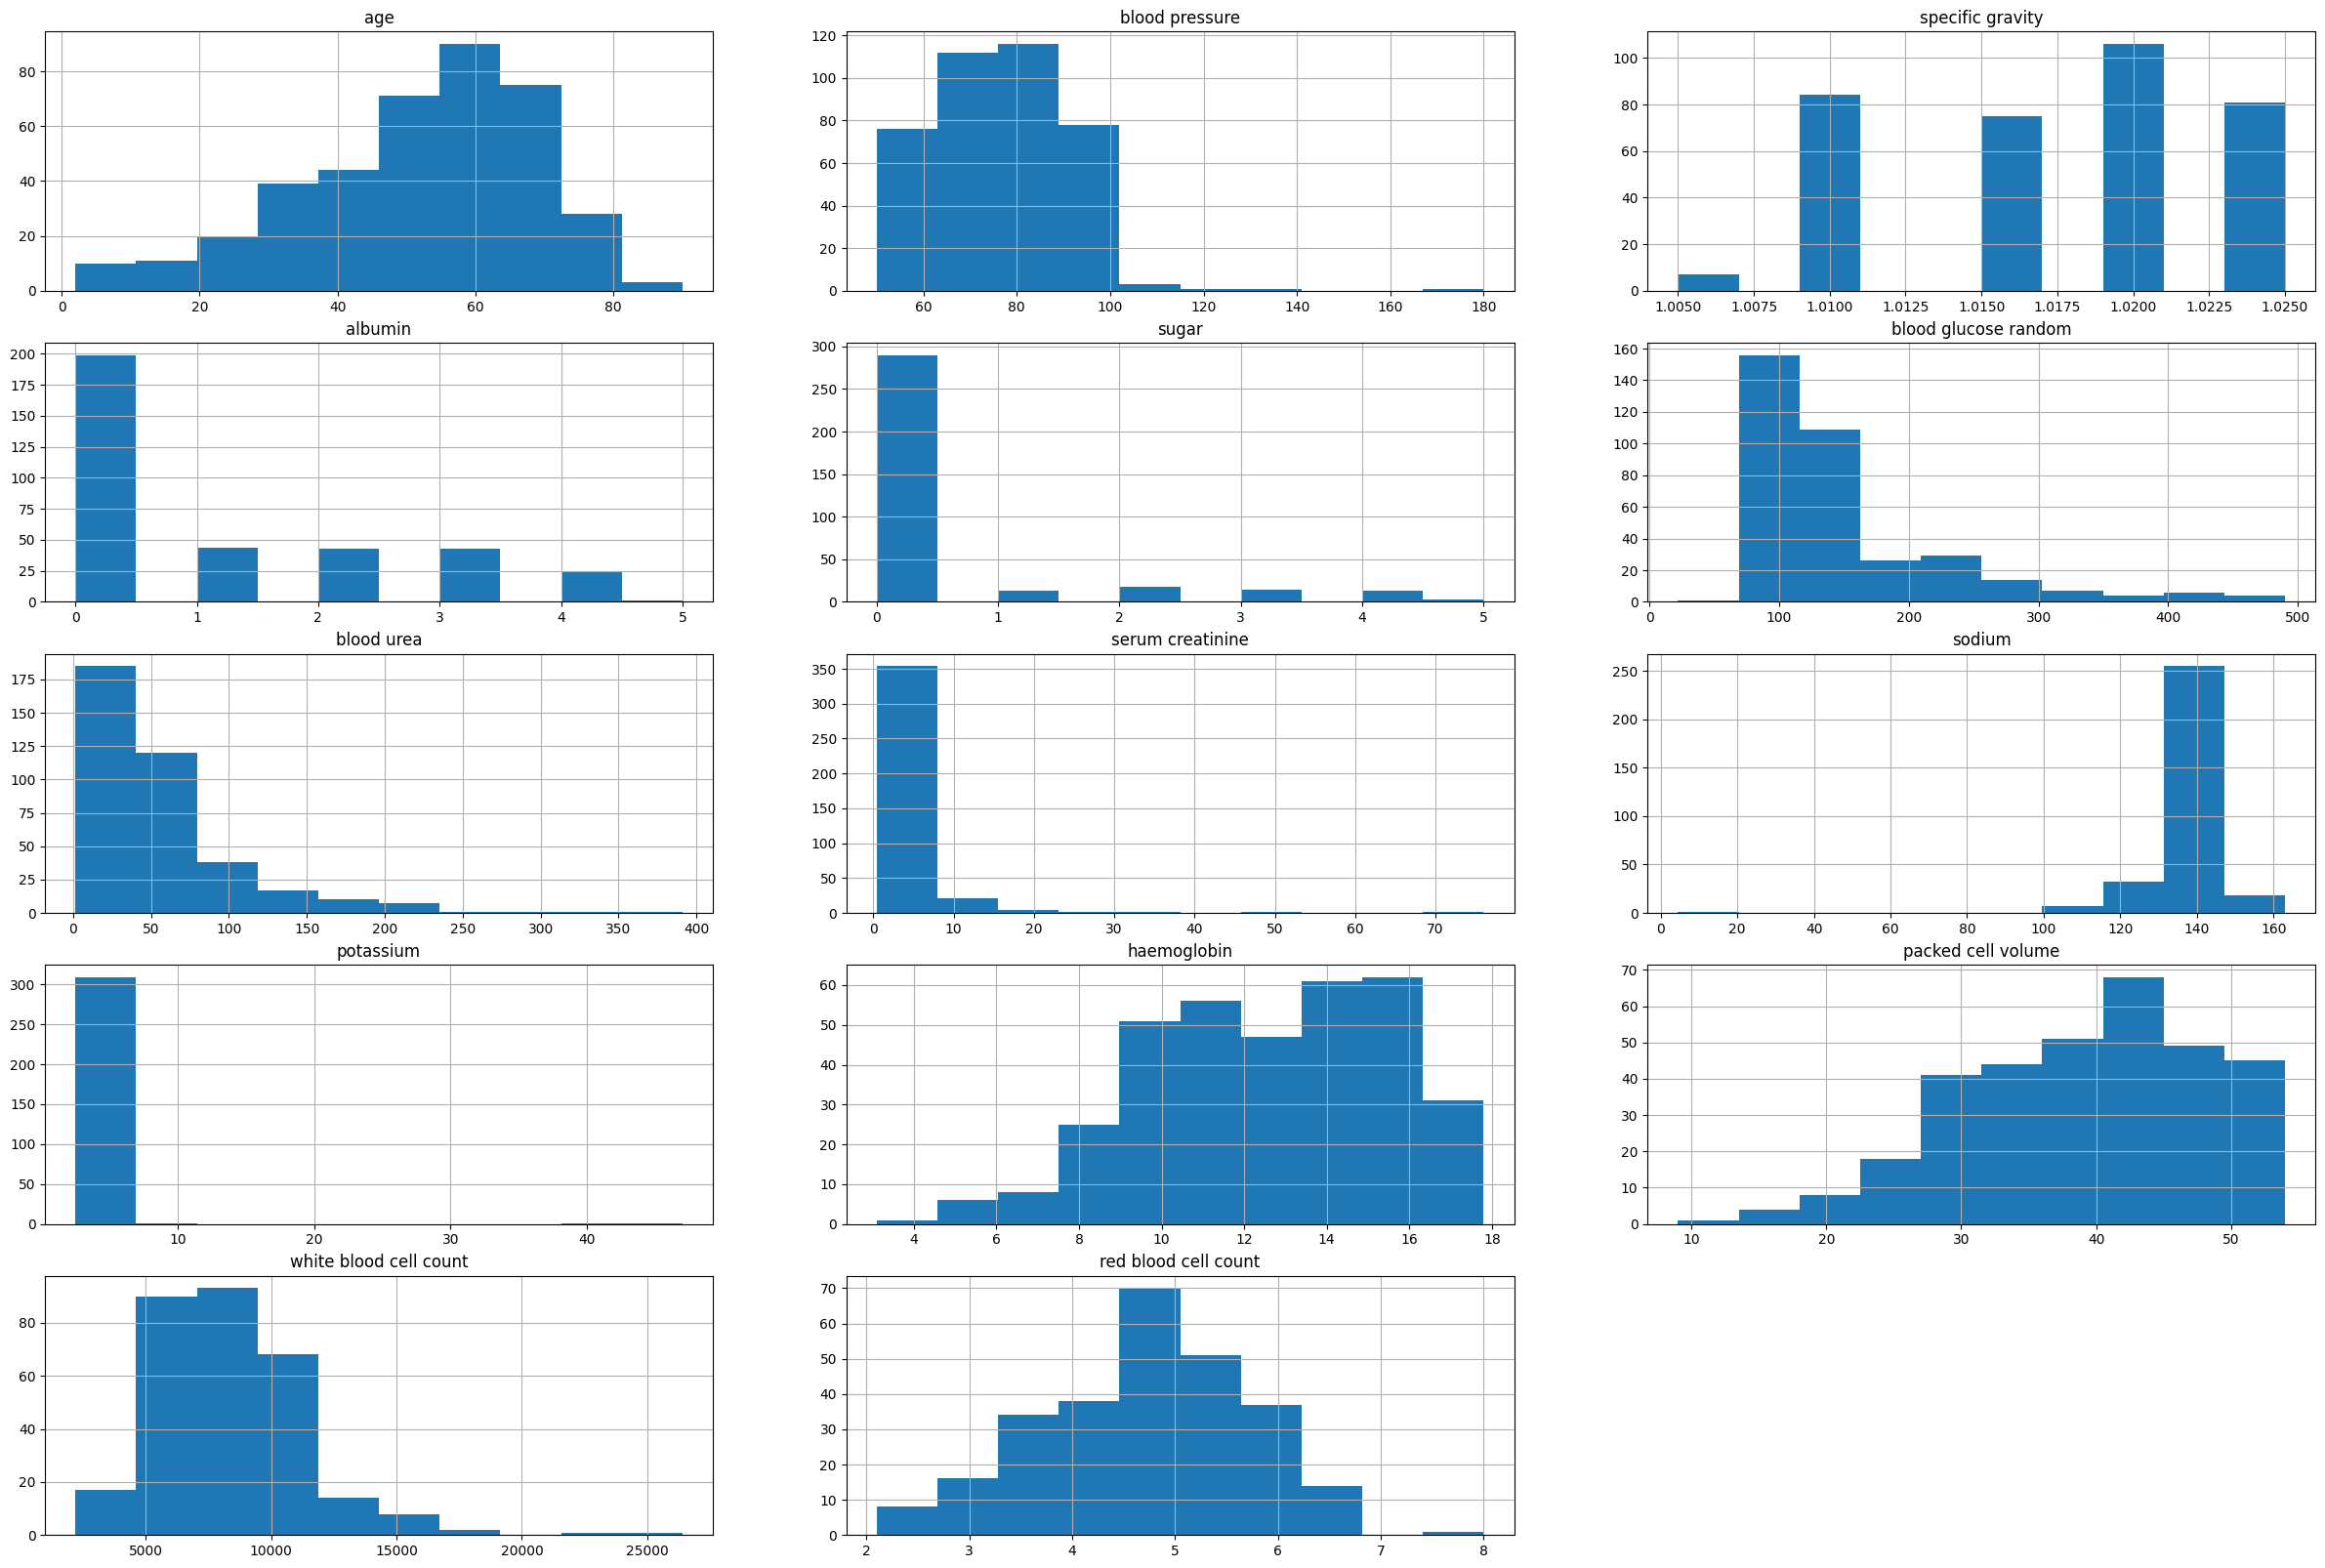

In [ ]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(num_col):
      plt.subplot(5,3,i+1)
      df[feature].hist()
      plt.title(feature)

In [ ]:
len(cat_col)

11

In [ ]:
df.corr()

age  blood pressure  specific gravity   albumin  \
age                     1.000000        0.159480         -0.191096  0.122091   
blood pressure          0.159480        1.000000         -0.218836  0.160689   
specific gravity       -0.191096       -0.218836          1.000000 -0.469760   
albumin                 0.122091        0.160689         -0.469760  1.000000   
sugar                   0.220866        0.222576         -0.296234  0.269305   
blood glucose random    0.244992        0.160193         -0.374710  0.379464   
blood urea              0.196985        0.188517         -0.314295  0.453528   
serum creatinine        0.132531        0.146222         -0.361473  0.399198   
sodium                 -0.100046       -0.116422          0.412190 -0.459896   
potassium               0.058377        0.075151         -0.072787  0.129038   
haemoglobin            -0.192928       -0.306540          0.602582 -0.634632   
packed cell volume     -0.242119       -0.326319          0.603560 -0.611891   
white blood cell count  0.118339        0.029753         -0.236215  0.231989   
red blood cell count   -0.268896       -0.261936          0.579476 -0.566437   

                           sugar  blood glucose random  blood urea  \
age                     0.220866              0.244992    0.196985   
blood pressure          0.222576              0.160193    0.188517   
specific gravity       -0.296234             -0.374710   -0.314295   
albumin                 0.269305              0.379464    0.453528   
sugar                   1.000000              0.717827    0.168583   
blood glucose random    0.717827              1.000000    0.143322   
blood urea              0.168583              0.143322    1.000000   
serum creatinine        0.223244              0.114875    0.586368   
sodium                 -0.131776             -0.267848   -0.323054   
potassium               0.219450              0.066966    0.357049   
haemoglobin            -0.224775             -0.306189   -0.610360   
packed cell volume     -0.239189             -0.301385   -0.607621   
white blood cell count  0.184893              0.150015    0.050462   
red blood cell count   -0.237448             -0.281541   -0.579087   

                        serum creatinine    sodium  potassium  haemoglobin  \
age                             0.132531 -0.100046   0.058377    -0.192928   
blood pressure                  0.146222 -0.116422   0.075151    -0.306540   
specific gravity               -0.361473  0.412190  -0.072787     0.602582   
albumin                         0.399198 -0.459896   0.129038    -0.634632   
sugar                           0.223244 -0.131776   0.219450    -0.224775   
blood glucose random            0.114875 -0.267848   0.066966    -0.306189   
blood urea                      0.586368 -0.323054   0.357049    -0.610360   
serum creatinine                1.000000 -0.690158   0.326107    -0.401670   
sodium                         -0.690158  1.000000   0.097887     0.365183   
potassium                       0.326107  0.097887   1.000000    -0.133746   
haemoglobin                    -0.401670  0.365183  -0.133746     1.000000   
packed cell volume             -0.404193  0.376914  -0.163182     0.895382   
white blood cell count         -0.006390  0.007277  -0.105576    -0.169413   
red blood cell count           -0.400852  0.344873  -0.158309     0.798880   

                        packed cell volume  white blood cell count  \
age                              -0.242119                0.118339   
blood pressure                   -0.326319                0.029753   
specific gravity                  0.603560               -0.236215   
albumin                          -0.611891                0.231989   
sugar                            -0.239189                0.184893   
blood glucose random             -0.301385                0.150015   
blood urea                       -0.607621                0.050462   
serum creatinine                 -0.404193    

<Axes: >

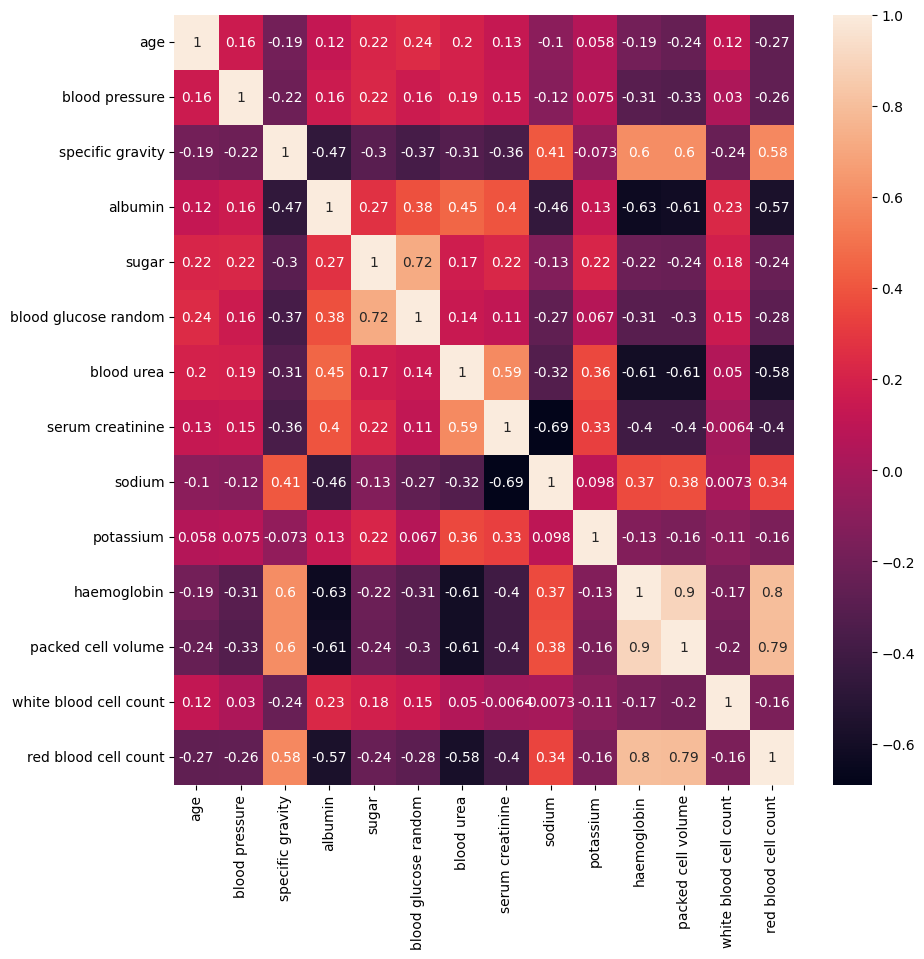

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px

In [ ]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [ ]:
px.violin(df,y='red blood cell count',x='class',color='class')

Find relationship between haemoglobin and packed cell volume

In [ ]:
px.scatter(df,x='haemoglobin',y='packed cell volume')

Analysing distribution of red_blood_cell_count chronic as well as non chronic

In [ ]:
import seaborn as sns

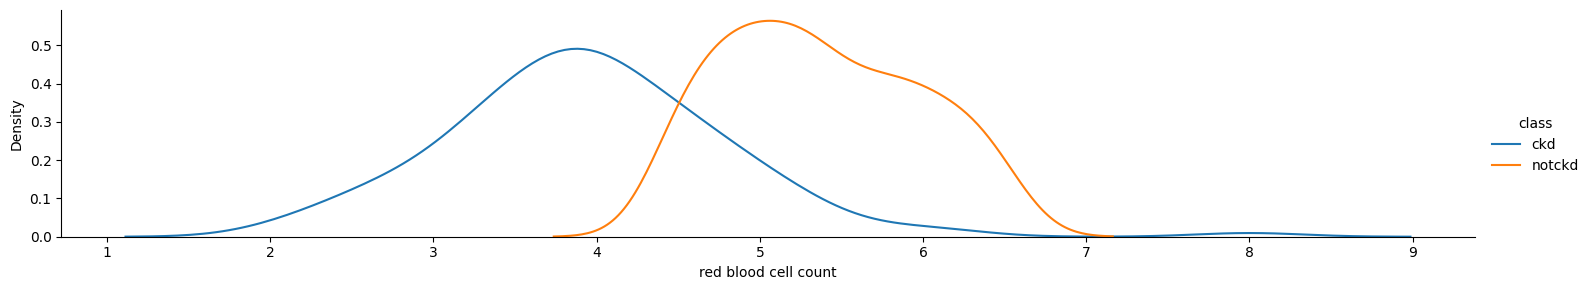

In [ ]:
grid=sns.FacetGrid(df,hue='class',aspect=5)
grid.map(sns.kdeplot,'red blood cell count')
grid.add_legend()

In [ ]:
def violin(col):
  fig=px.violin(df,y=col,x='class',color='class',box='true')
  return fig.show()

In [ ]:
def scatters(col1,col2):
  fig=px.scatter(df,x=col1,y=col2,color='class')
  return fig.show()

In [ ]:
def kde_plot(feature):   
     grid=sns.FacetGrid(df,hue='class',aspect=5)
     grid.map(sns.kdeplot,'red blood cell count')
     grid.add_legend()

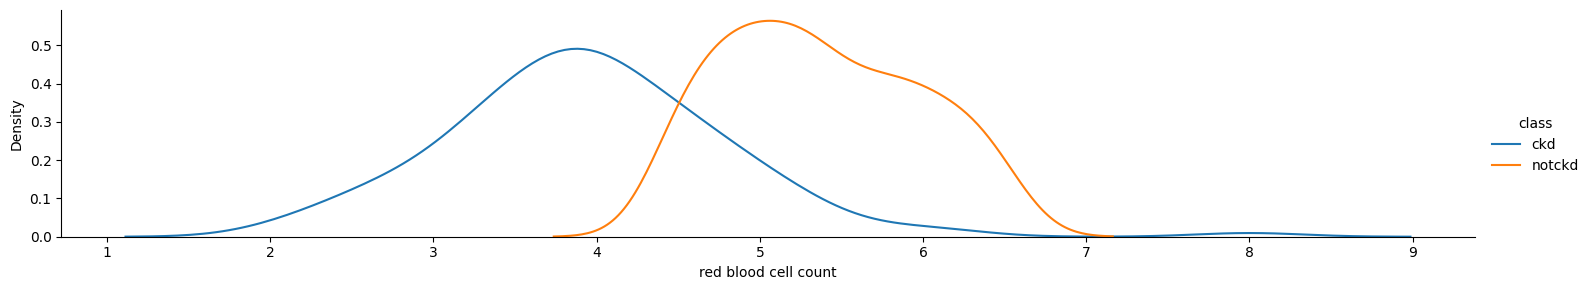

In [ ]:
kde_plot('red blood cell count')

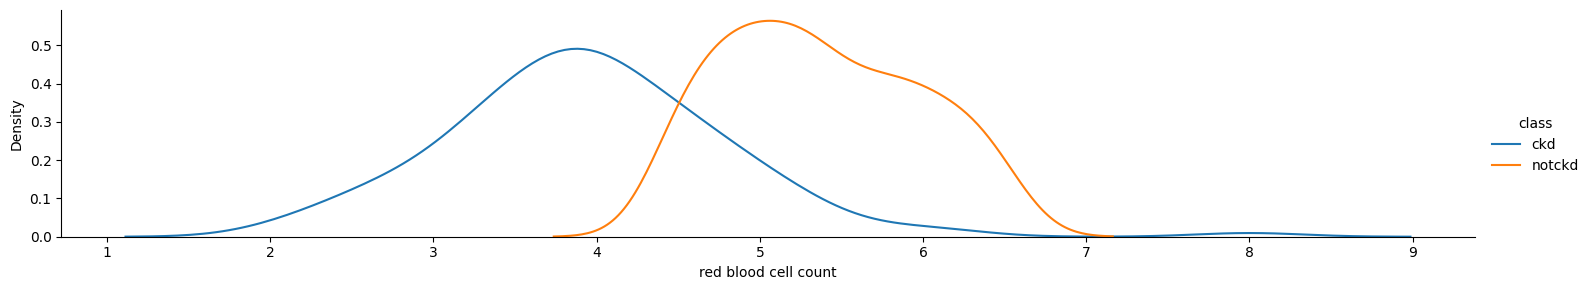

In [ ]:
kde_plot('haemoglobin')

Positive correlation study with its impact on classes

In [ ]:
scatters('red blood cell count', 'haemoglobin')

In [ ]:
scatters('red blood cell count', 'packed cell volume')

In [ ]:
scatters('haemoglobin','packed cell volume')

Inference from above plots

 1.RBC count range ~2 to <4.5 and Hemoglobin between 3 to <13 are mostly classified as positive for chronic kidney  
    disease(i.e ckd).
    2.RBC count range >4.5 to ~6.1 and Hemoglobin between >13 to 17.8 are classified as negative for chronic kidney 
    disease(i.e nockd).

In [ ]:
def violin(col):
  fig=px.violin(df,y=col,x='class',box='true')
  return fig.show()

Negative correlation study with its impact on classes

In [ ]:
scatters('red blood cell count','albumin')

In [ ]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [ ]:
scatters('packed cell volume','blood urea')

Inference from the above:Packed cell volume >= 40 largely affects to be non ckd

In [ ]:
fig = px.bar(df, x="specific gravity", y="packed cell volume",
             color='class', barmode='group',
             height=400)
fig.show()

 Clearly, specific gravity >=1.02 shows non ckd

In [ ]:
df.isna().sum().sort_values(ascending=True)

class                        0
pedal edema                  1
appetite                     1
anemia                       1
coronary artery disease      2
diabetes mellitus            2
ypertension                  2
pus cell clumps              4
bacteria                     4
age                          9
blood pressure              12
serum creatinine            17
blood urea                  19
blood glucose random        44
albumin                     46
specific gravity            47
sugar                       49
haemoglobin                 52
 pus cell                   65
packed cell volume          71
sodium                      87
potassium                   88
white blood cell count     106
red blood cell count       131
red blood cells            152
dtype: int64

In [ ]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [ ]:
data=df.copy()

In [ ]:
random_sample=data['red blood cells'].dropna().sample(data['red blood cells'].isnull().sum())
random_sample

331      normal
29     abnormal
347      normal
38     abnormal
361      normal
         ...   
339      normal
367      normal
251      normal
289      normal
248    abnormal
Name: red blood cells, Length: 152, dtype: object

In [ ]:
random_sample.index

Int64Index([331,  29, 347,  38, 361, 159, 103, 392, 374, 312,
            ...
            269, 270, 250,  39, 143, 339, 367, 251, 289, 248],
           dtype='int64', length=152)

In [ ]:
data['red blood cells'].value_counts()/len(data)

normal      0.5025
abnormal    0.1175
Name: red blood cells, dtype: float64

In [ ]:
len(df[df['red blood cells']=='normal'])/248

0.8104838709677419

In [ ]:
len(df[df['red blood cells']=='abnormal'])/248

0.18951612903225806

In [ ]:
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

In [ ]:

Random_value_imputation('red blood cells')

In [ ]:
data[cat_col].isnull().sum()

red blood cells             0
 pus cell                  65
pus cell clumps             4
bacteria                    4
ypertension                 2
diabetes mellitus           2
coronary artery disease     2
appetite                    1
pedal edema                 1
anemia                      1
class                       0
dtype: int64

In [ ]:
for col in num_col:
    Random_value_imputation(col)

In [ ]:
data[num_col].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [ ]:
def impute_mode(feature):
  mode=data[feature].mode()[0]
  data[feature]=data[feature].fillna(mode)

In [ ]:
for col in cat_col:
  impute_mode(col)

In [ ]:
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

Feature Encoding

In [ ]:
for col in cat_col:
    print('{} has {} categories'.format(col, data[col].nunique()))

red blood cells has 2 categories
 pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 3 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [ ]:
data.head()

age  blood pressure  specific gravity  albumin  sugar  red blood cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

    pus cell  pus cell clumps  bacteria  blood glucose random  ...  \
0          1                0         0                 121.0  ...   
1          1                0         0                  99.0  ...   
2          1                0         0                 423.0  ...   
3          0                1         0                 117.0  ...   
4          1                0         0                 106.0  ...   

   packed cell volume  white blood cell count  red blood cell count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   3.8   
2                31.0                  7500.0                   5.6   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   ypertension  diabetes mellitus  coronary artery disease  appetite  \
0            1                  2                        0         0   
1            0                  1                        0         0   
2            0                  2                        0         1   
3            1                  1                        0         1   
4            0                  1                        0         0   

   pedal edema  anemia  class  
0            0       0      0  
1            0       0      0  
2            0       1      0  
3            1       1      0  
4            0       0      0  

[5 rows x 25 columns]

Applying Select K best technique(to find best feature)

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
ind_col=[col for col in data.columns if col != 'class']
dep_col='class' 

In [ ]:
X=data[ind_col]
y=data[dep_col]

In [ ]:
X.head()

age  blood pressure  specific gravity  albumin  sugar  red blood cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

    pus cell  pus cell clumps  bacteria  blood glucose random  ...  \
0          1                0         0                 121.0  ...   
1          1                0         0                  99.0  ...   
2          1                0         0                 423.0  ...   
3          0                1         0                 117.0  ...   
4          1                0         0                 106.0  ...   

   haemoglobin  packed cell volume  white blood cell count  \
0         15.4                44.0                  7800.0   
1         11.3                38.0                  6000.0   
2          9.6                31.0                  7500.0   
3         11.2                32.0                  6700.0   
4         11.6                35.0                  7300.0   

   red blood cell count  ypertension  diabetes mellitus  \
0                   5.2            1                  2   
1                   3.8            0                  1   
2                   5.6            0                  2   
3                   3.9            1                  1   
4                   4.6            0                  1   

   coronary artery disease  appetite  pedal edema  anemia  
0                        0         0            0       0  
1                        0         0            0       0  
2                        0         1            0       1  
3                        0         1            1       1  
4                        0         0            0       0  

[5 rows x 24 columns]

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [ ]:

ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [ ]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x7f689e717790>)

In [ ]:
#To get scores(rank) of feature,what we can do we can use scores function
ordered_feature.scores_

array([1.09791083e+02, 8.31534944e+01, 5.35024264e-03, 2.28900159e+02,
       9.67750916e+01, 8.44803313e+00, 1.06962963e+01, 2.52000000e+01,
       1.32000000e+01, 2.55356183e+03, 2.25360161e+03, 3.70603632e+02,
       2.52319987e+01, 6.24418504e+00, 1.18540113e+02, 3.17976077e+02,
       1.06873543e+04, 1.83082147e+01, 8.82000000e+01, 2.04392523e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [ ]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
datascores

Score
0     109.791083
1      83.153494
2       0.005350
3     228.900159
4      96.775092
5       8.448033
6      10.696296
7      25.200000
8      13.200000
9    2553.561832
10   2253.601607
11    370.603632
12     25.231999
13      6.244185
14    118.540113
15    317.976077
16  10687.354341
17     18.308215
18     88.200000
19     20.439252
20     20.400000
21     49.200000
22     45.600000
23     36.000000

In [ ]:
dfcolumns=pd.DataFrame(X.columns)
dfcolumns

0
0                       age
1            blood pressure
2          specific gravity
3                   albumin
4                     sugar
5           red blood cells
6                  pus cell
7           pus cell clumps
8                  bacteria
9      blood glucose random
10               blood urea
11         serum creatinine
12                   sodium
13                potassium
14              haemoglobin
15       packed cell volume
16   white blood cell count
17     red blood cell count
18              ypertension
19        diabetes mellitus
20  coronary artery disease
21                 appetite
22              pedal edema
23                   anemia

In [ ]:
features_rank=pd.concat([dfcolumns,datascores],axis=1)

In [ ]:
features_rank

0         Score
0                       age    109.791083
1            blood pressure     83.153494
2          specific gravity      0.005350
3                   albumin    228.900159
4                     sugar     96.775092
5           red blood cells      8.448033
6                  pus cell     10.696296
7           pus cell clumps     25.200000
8                  bacteria     13.200000
9      blood glucose random   2553.561832
10               blood urea   2253.601607
11         serum creatinine    370.603632
12                   sodium     25.231999
13                potassium      6.244185
14              haemoglobin    118.540113
15       packed cell volume    317.976077
16   white blood cell count  10687.354341
17     red blood cell count     18.308215
18              ypertension     88.200000
19        diabetes mellitus     20.439252
20  coronary artery disease     20.400000
21                 appetite     49.200000
22              pedal edema     45.600000
23                   anemia     36.000000

In [ ]:
features_rank

0         Score
0                       age    109.791083
1            blood pressure     83.153494
2          specific gravity      0.005350
3                   albumin    228.900159
4                     sugar     96.775092
5           red blood cells      8.448033
6                  pus cell     10.696296
7           pus cell clumps     25.200000
8                  bacteria     13.200000
9      blood glucose random   2553.561832
10               blood urea   2253.601607
11         serum creatinine    370.603632
12                   sodium     25.231999
13                potassium      6.244185
14              haemoglobin    118.540113
15       packed cell volume    317.976077
16   white blood cell count  10687.354341
17     red blood cell count     18.308215
18              ypertension     88.200000
19        diabetes mellitus     20.439252
20  coronary artery disease     20.400000
21                 appetite     49.200000
22              pedal edema     45.600000
23                   anemia     36.000000

In [ ]:
features_rank.columns=['Features','Score']
features_rank

Features         Score
0                       age    109.791083
1            blood pressure     83.153494
2          specific gravity      0.005350
3                   albumin    228.900159
4                     sugar     96.775092
5           red blood cells      8.448033
6                  pus cell     10.696296
7           pus cell clumps     25.200000
8                  bacteria     13.200000
9      blood glucose random   2553.561832
10               blood urea   2253.601607
11         serum creatinine    370.603632
12                   sodium     25.231999
13                potassium      6.244185
14              haemoglobin    118.540113
15       packed cell volume    317.976077
16   white blood cell count  10687.354341
17     red blood cell count     18.308215
18              ypertension     88.200000
19        diabetes mellitus     20.439252
20  coronary artery disease     20.400000
21                 appetite     49.200000
22              pedal edema     45.600000
23                   anemia     36.000000

In [ ]:
#fetch largest 10 values of Score column
features_rank.nlargest(10,'Score')

Features         Score
16  white blood cell count  10687.354341
9     blood glucose random   2553.561832
10              blood urea   2253.601607
11        serum creatinine    370.603632
15      packed cell volume    317.976077
3                  albumin    228.900159
14             haemoglobin    118.540113
0                      age    109.791083
4                    sugar     96.775092
18             ypertension     88.200000

In [ ]:
selected_columns=features_rank.nlargest(10,'Score')['Features'].values

In [ ]:
X_new=data[selected_columns]

XGBoost- XGBClassifier and Randomized Search CV

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y,train_size=0.75)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(300, 10)
(100, 10)


In [ ]:
## check whether dataset is imbalance or not
y_train.value_counts()

0    190
1    110
Name: class, dtype: int64

In [ ]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
## Hyper Parameter Optimization with respect to XGBoost

params={
 "learning_rate"    : [0.05, 0.20, 0.25 ] ,
 "max_depth"        : [ 5, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.7 ]
    
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from xgboost import XGBClassifier
classifier=XGBClassifier()

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25],
                                        'max_depth': [5, 8, 10, 12],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.25,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [ ]:
classifier=XGBClassifier()

In [ ]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

Confusion Matrix

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[60  0]
 [ 5 35]]


Accuracy for the model

In [ ]:
accuracy_score(y_test, y_pred)

0.95

Random Forest

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('drive/MyDrive/dis.csv')

In [ ]:
for i in ['rc','wc','pcv']:
    data[i] = data[i].str.extract('(\d+)').astype(float)

In [ ]:
#filling the null values with the mean values 
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    data[i].fillna(data[i].mean(),inplace=True)

In [ ]:
#converting the categorial data by using oneHot Encoding
rbc = pd.get_dummies(data[["rbc"]],drop_first=True)
rbc.head()

rbc_normal
0           0
1           0
2           1
3           1
4           1

In [ ]:
pc = pd.get_dummies(data[["pc"]],drop_first=True)

In [ ]:
pcc = pd.get_dummies(data[["pcc"]],drop_first=True)

In [ ]:
ba = pd.get_dummies(data[["ba"]],drop_first=True)
ba.head()

ba_present
0           0
1           0
2           0
3           0
4           0

In [ ]:
#dropping the categorial data columns
data.drop(["rbc","pc","pcc","ba"],axis=1,inplace=True)

In [ ]:
#concating the data columns
data = pd.concat([data,rbc,pc,pcc,ba],axis=1)

In [ ]:
#converting the age Data column into list
k=data["age"].apply(lambda x : int(x)//10).to_list()

In [ ]:
#batching the ages(0-9,10-19,20-29,......90-99)
a=[0]*10
for i in range(len(k)):
    a[k[i]]+=1
a

[10, 11, 23, 43, 71, 91, 96, 47, 7, 1]

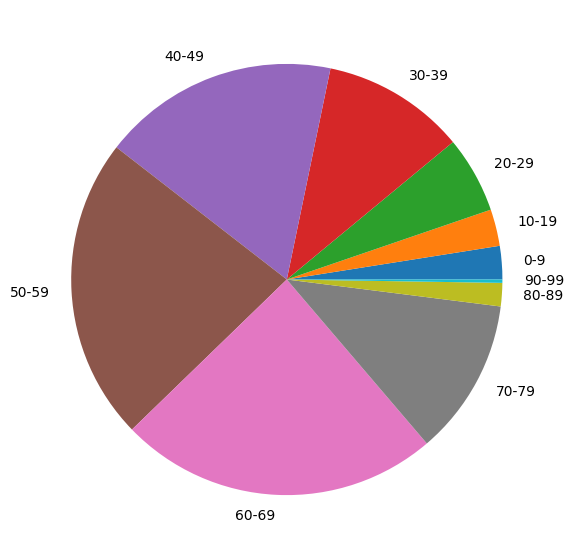

In [ ]:
plt.figure(figsize= (7,7))
x_labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
y_labels = np.array(a)
plt.pie(y_labels, labels = x_labels)
plt.show()

In [ ]:
#replacing the values of notckd, ckd and ckd/t in the dataset
data.replace({"notckd":0,"ckd":1,"ckd\t":1},inplace=True)

In [ ]:
#replacing the values of no, yes to 0,1 respectively
data.replace({"no":0,"yes":1,"\tno":0,"\tyes":1," yes":1},inplace=True)

In [ ]:
#if still null values present then replacing the null value with the most frequent value in the column
data=data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [ ]:
#seperating the data for the model as X contains the data which feed to the model and y contains the target column 
X = data.loc[:,['age', 'bp', 'rc','wc','pc_normal','htn','hemo','bgr','dm','ane']]
y = data["classification"]

In [ ]:
#splitting the train data and test Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)
X_train.head()

age    bp        rc           wc  pc_normal  htn  hemo         bgr   dm  \
336  25.0  60.0  5.000000  9200.000000          1  0.0  15.2  119.000000  0.0   
64   55.0  80.0  4.241636  8406.122449          1  0.0   9.8  146.000000  0.0   
55   35.0  80.0  4.241636  8406.122449          1  0.0   9.5  148.036517  0.0   
106  50.0  90.0  4.241636  6500.000000          0  1.0   6.0   89.000000  1.0   
300  45.0  60.0  5.000000  9200.000000          1  0.0  15.0  114.000000  0.0   

     ane  
336  0.0  
64   0.0  
55   0.0  
106  1.0  
300  0.0

In [ ]:
X_train

age     bp        rc            wc  pc_normal  htn       hemo  \
336  25.000000   60.0  5.000000   9200.000000          1  0.0  15.200000   
64   55.000000   80.0  4.241636   8406.122449          1  0.0   9.800000   
55   35.000000   80.0  4.241636   8406.122449          1  0.0   9.500000   
106  50.000000   90.0  4.241636   6500.000000          0  1.0   6.000000   
300  45.000000   60.0  5.000000   9200.000000          1  0.0  15.000000   
..         ...    ...       ...           ...        ...  ...        ...   
323  43.000000   80.0  4.000000   7800.000000          1  0.0  15.900000   
192  46.000000  110.0  4.241636   8406.122449          1  0.0  12.526437   
117  51.483376   70.0  4.000000   9800.000000          0  0.0  12.500000   
47   11.000000   80.0  4.241636   8600.000000          1  0.0  15.000000   
172  62.000000   80.0  4.000000  12800.000000          0  0.0  10.600000   

            bgr   dm  ane  
336  119.000000  0.0  0.0  
64   146.000000  0.0  0.0  
55   148.036517  0.0  0.0  
106   89.000000  1.0  1.0  
300  114.000000  0.0  0.0  
..          ...  ...  ...  
323  130.000000  0.0  0.0  
192  130.000000  0.0  0.0  
117  219.000000  0.0  0.0  
47   148.036517  0.0  0.0  
172  309.000000  0.0  0.0  

[320 rows x 10 columns]

In [ ]:
data["appet"].value_counts()

good    318
poor     82
Name: appet, dtype: int64

In [ ]:
#using the random forest classifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#getting the predictions using the trained model
predictions = model.predict(X_test)

In [ ]:
#checking the mean absolute error between the predicted values and test data
print("the mean absolute error by using the RandomForest is",mean_absolute_error(y_test,predictions))

the mean absolute error by using the RandomForest is 0.05


Accuracy for the model

In [ ]:
#printing the accuracy of the train data
print("the accuracy of the train data is ",model.score(X_train,y_train)*100)

the accuracy of the train data is  100.0


In [ ]:
#printing the accuracy of the test data
print("the accuracy of the test data is",model.score(X_test,y_test)*100)

the accuracy of the test data is 95.0


Decision Tree

In [ ]:
df=data.copy()

Accuracy

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
model = dtc.fit(X_train, y_train)
#tree.plot_tree(model)
# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(X_test))
tn, fp, fn, tp = confusion.ravel()
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9625 

Confusion Matrix :- 
[[28  0]
 [ 3 49]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.94      0.97        52

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



In [ ]:
ind_col = [col for col in df.columns if col != 'classification'] #input features
dep_col = 'classification'  #to predict

In [ ]:
dep_col

'classification'

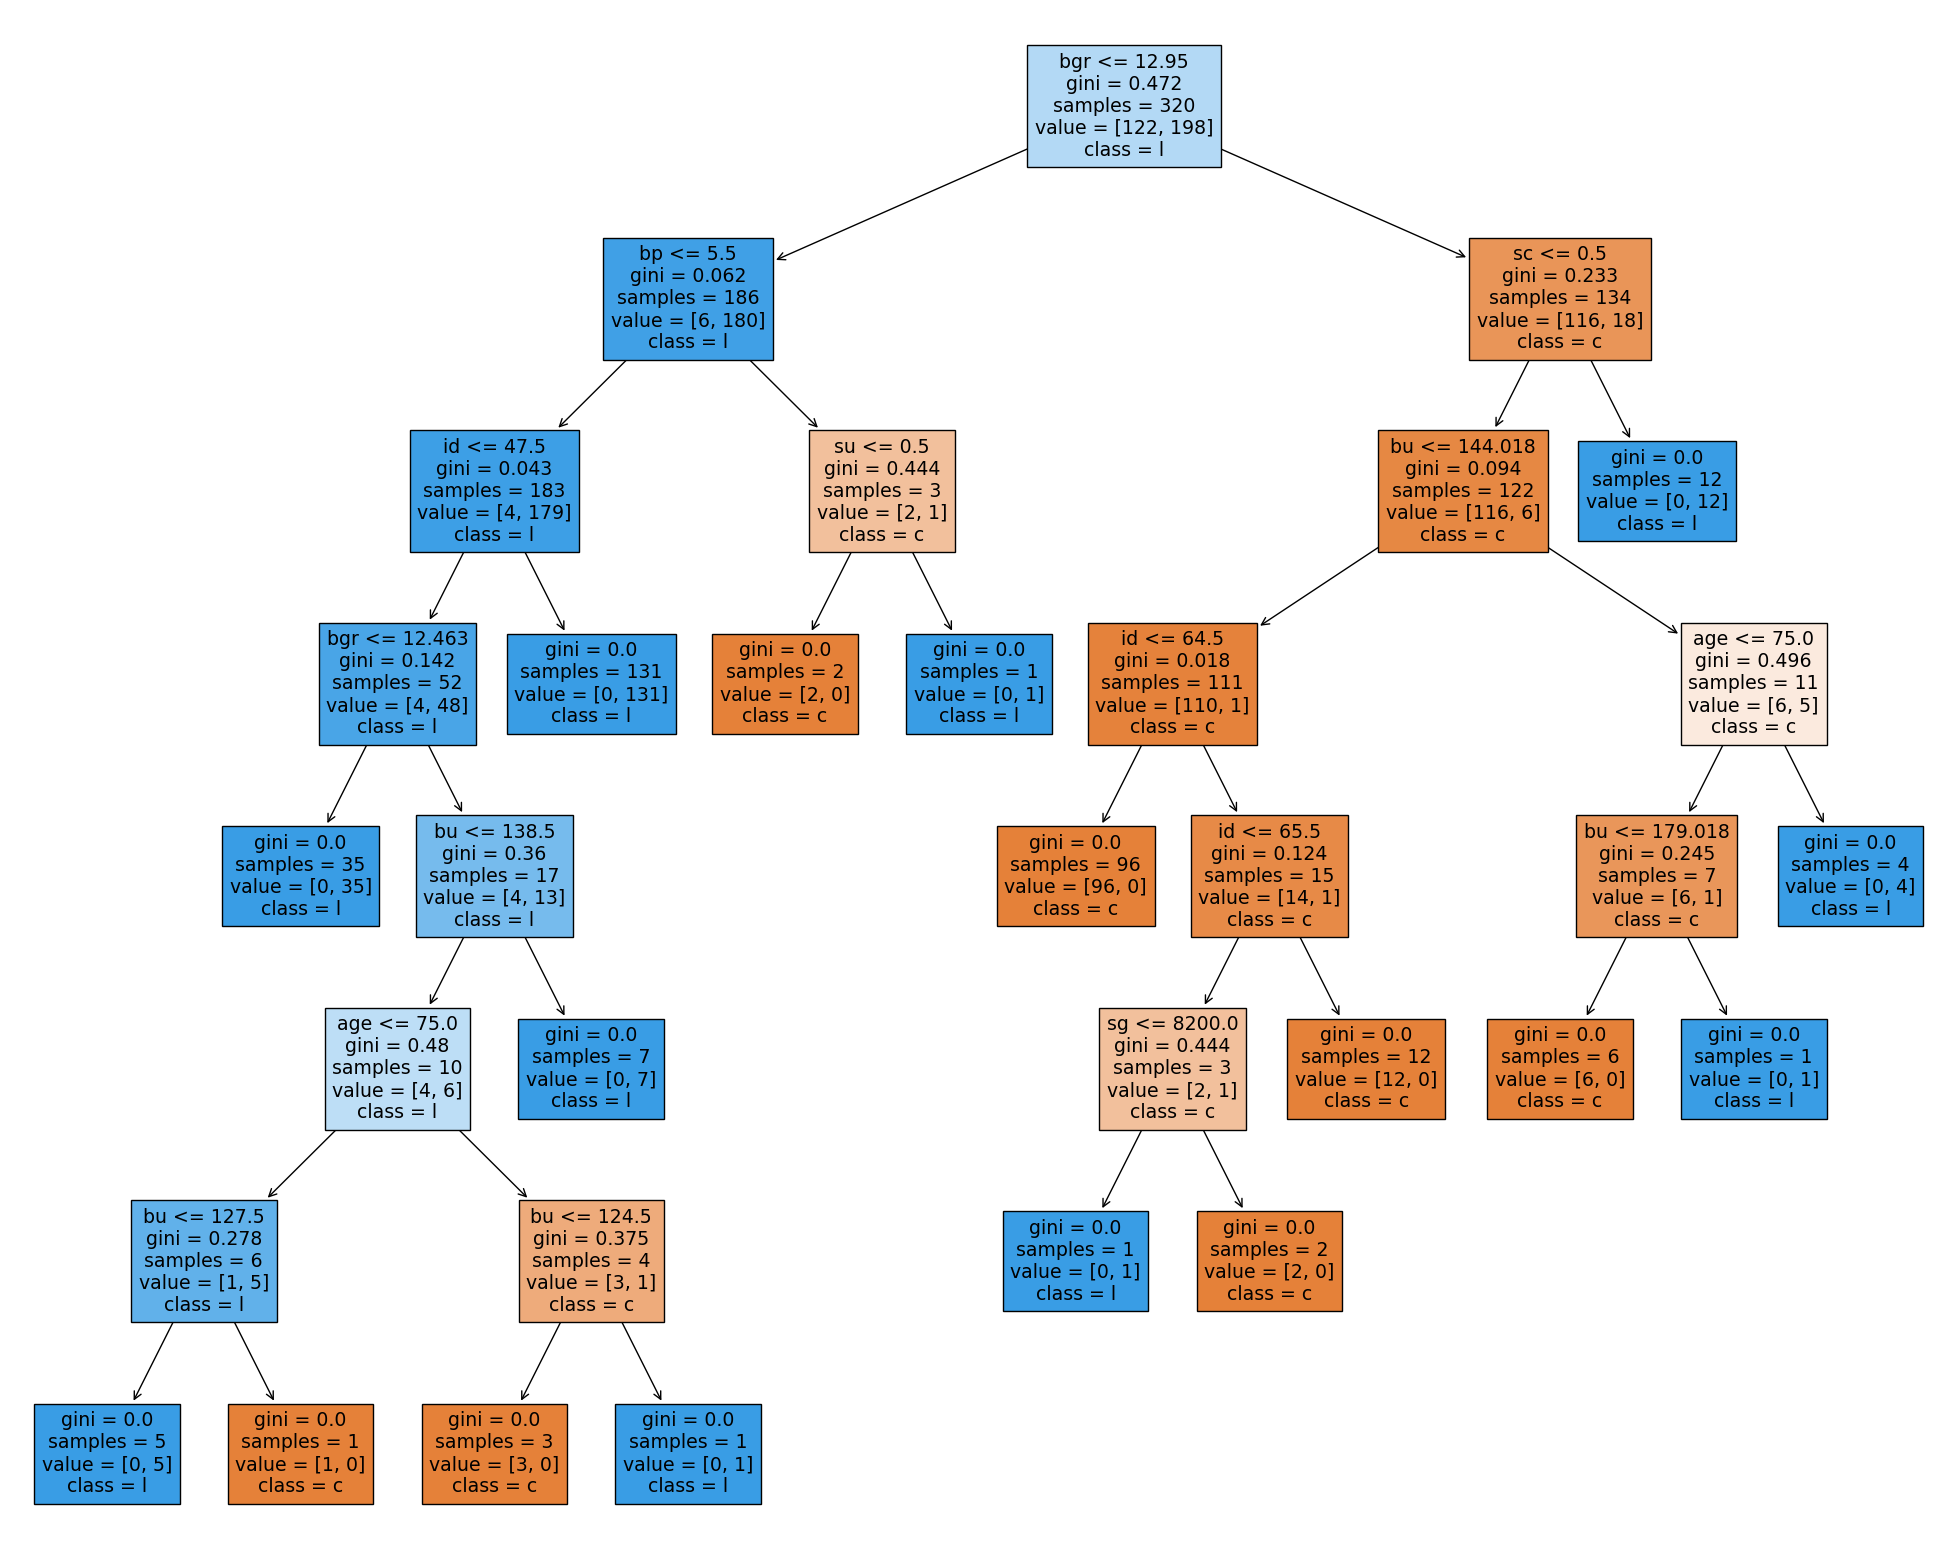

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=ind_col,  
                   class_names=dep_col,
                   filled=True)

Clustering and Prediction

In [ ]:
data=df.copy()

In [ ]:
data=pd.read_csv('dis.csv')
data

id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    notpresent  ...   38  6000  NaN   no   no   no  good   no   no   
2    notpresent  ...   31  7500  NaN   no  yes   no  poor   no  yes   
3    notpresent  ...   32  6700  3.9  yes   no   no  poor  yes  yes   
4    notpresent  ...   35  7300  4.6   no   no   no  good   no   no   
..          ...  ...  ...   ...  ...  ...  ...  ...   ...  ...  ...   
395  notpresent  ...   47  6700  4.9   no   no   no  good   no   no   
396  notpresent  ...   54  7800  6.2   no   no   no  good   no   no   
397  notpresent  ...   49  6600  5.4   no   no   no  good   no   no   
398  notpresent  ...   51  7200  5.9   no   no   no  good   no   no   
399  notpresent  ...   53  6800  6.1   no   no   no  good   no   no   

    classification  
0              ckd  
1              ckd  
2              ckd  
3              ckd  
4              ckd  
..             ...  
395         notckd  
396         notckd  
397         notckd  
398         notckd  
399         notckd  

[400 rows x 26 columns]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
for i in range(data.shape[0]):
    if data.iloc[i,25]=='ckd\t':
        data.iloc[i,25]='ckd'
    if data.iloc[i,20] in [' yes','\tyes']:
        data.iloc[i,20]='yes'
    if data.iloc[i,20]=='\tno':
        data.iloc[i,20]='no'
    if data.iloc[i,21]=='\tno':
        data.iloc[i,21]='no'
    if data.iloc[i,16]=='\t?':
        data.iloc[i,16]=np.nan
    if data.iloc[i,16]=='\t43':
        data.iloc[i,16]='43'
    if data.iloc[i,17]=='\t?':
        data.iloc[i,17]=np.nan
    if data.iloc[i,17]=='\t6200':
        data.iloc[i,17]= '6200'
    if data.iloc[i,17]=='\t8400':
        data.iloc[i,17]= '6200'
    if data.iloc[i,18]=='\t?':
        data.iloc[i,18]=np.nan
    if data.iloc[i,25]=='ckd':
        data.iloc[i,25]='yes'
    if data.iloc[i,25]=='notckd':
        data.iloc[i,25]='no'

In [ ]:
data.drop('id',axis=1,inplace=True)
data.head()

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
0  121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            yes  
1    NaN  ...   38  6000  NaN   no   no  no  good   no   no            yes  
2  423.0  ...   31  7500  NaN   no  yes  no  poor   no  yes            yes  
3  117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes            yes  
4  106.0  ...   35  7300  4.6   no   no  no  good   no   no            yes  

[5 rows x 25 columns]

In [ ]:
feature_names=['Age (yrs)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic Kidney Disease']
data.columns=feature_names

In [ ]:
for i in data.columns:
    print("unique values in {}:\n".format(i),data[i].unique())

unique values in Age (yrs):
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in Blood Pressure (mm/Hg):
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in Specific Gravity:
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in Albumin:
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in Sugar:
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in Red Blood Cells:
 [nan 'normal' 'abnormal']
unique values in Pus Cells:
 ['normal' 'abnormal' nan]
unique values in Pus Cell Clumps:
 ['notpresent' 'present' nan]
unique values in Bacteria:
 ['notpresent' 'present' nan]
unique values in Blood Glucose Random (mgs/dL):
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99.

In [ ]:
mistyped=['Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)']
numeric=[]
for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)
numeric=numeric+mistyped

In [ ]:
for col in mistyped:
        data[col]=data[col].astype('float')

In [ ]:
categoricals=[]
for col in data.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('Chronic Kidney Disease')

In [ ]:
categoricals

['Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia']

In [ ]:
import matplotlib.style as style
style.use('fivethirtyeight')

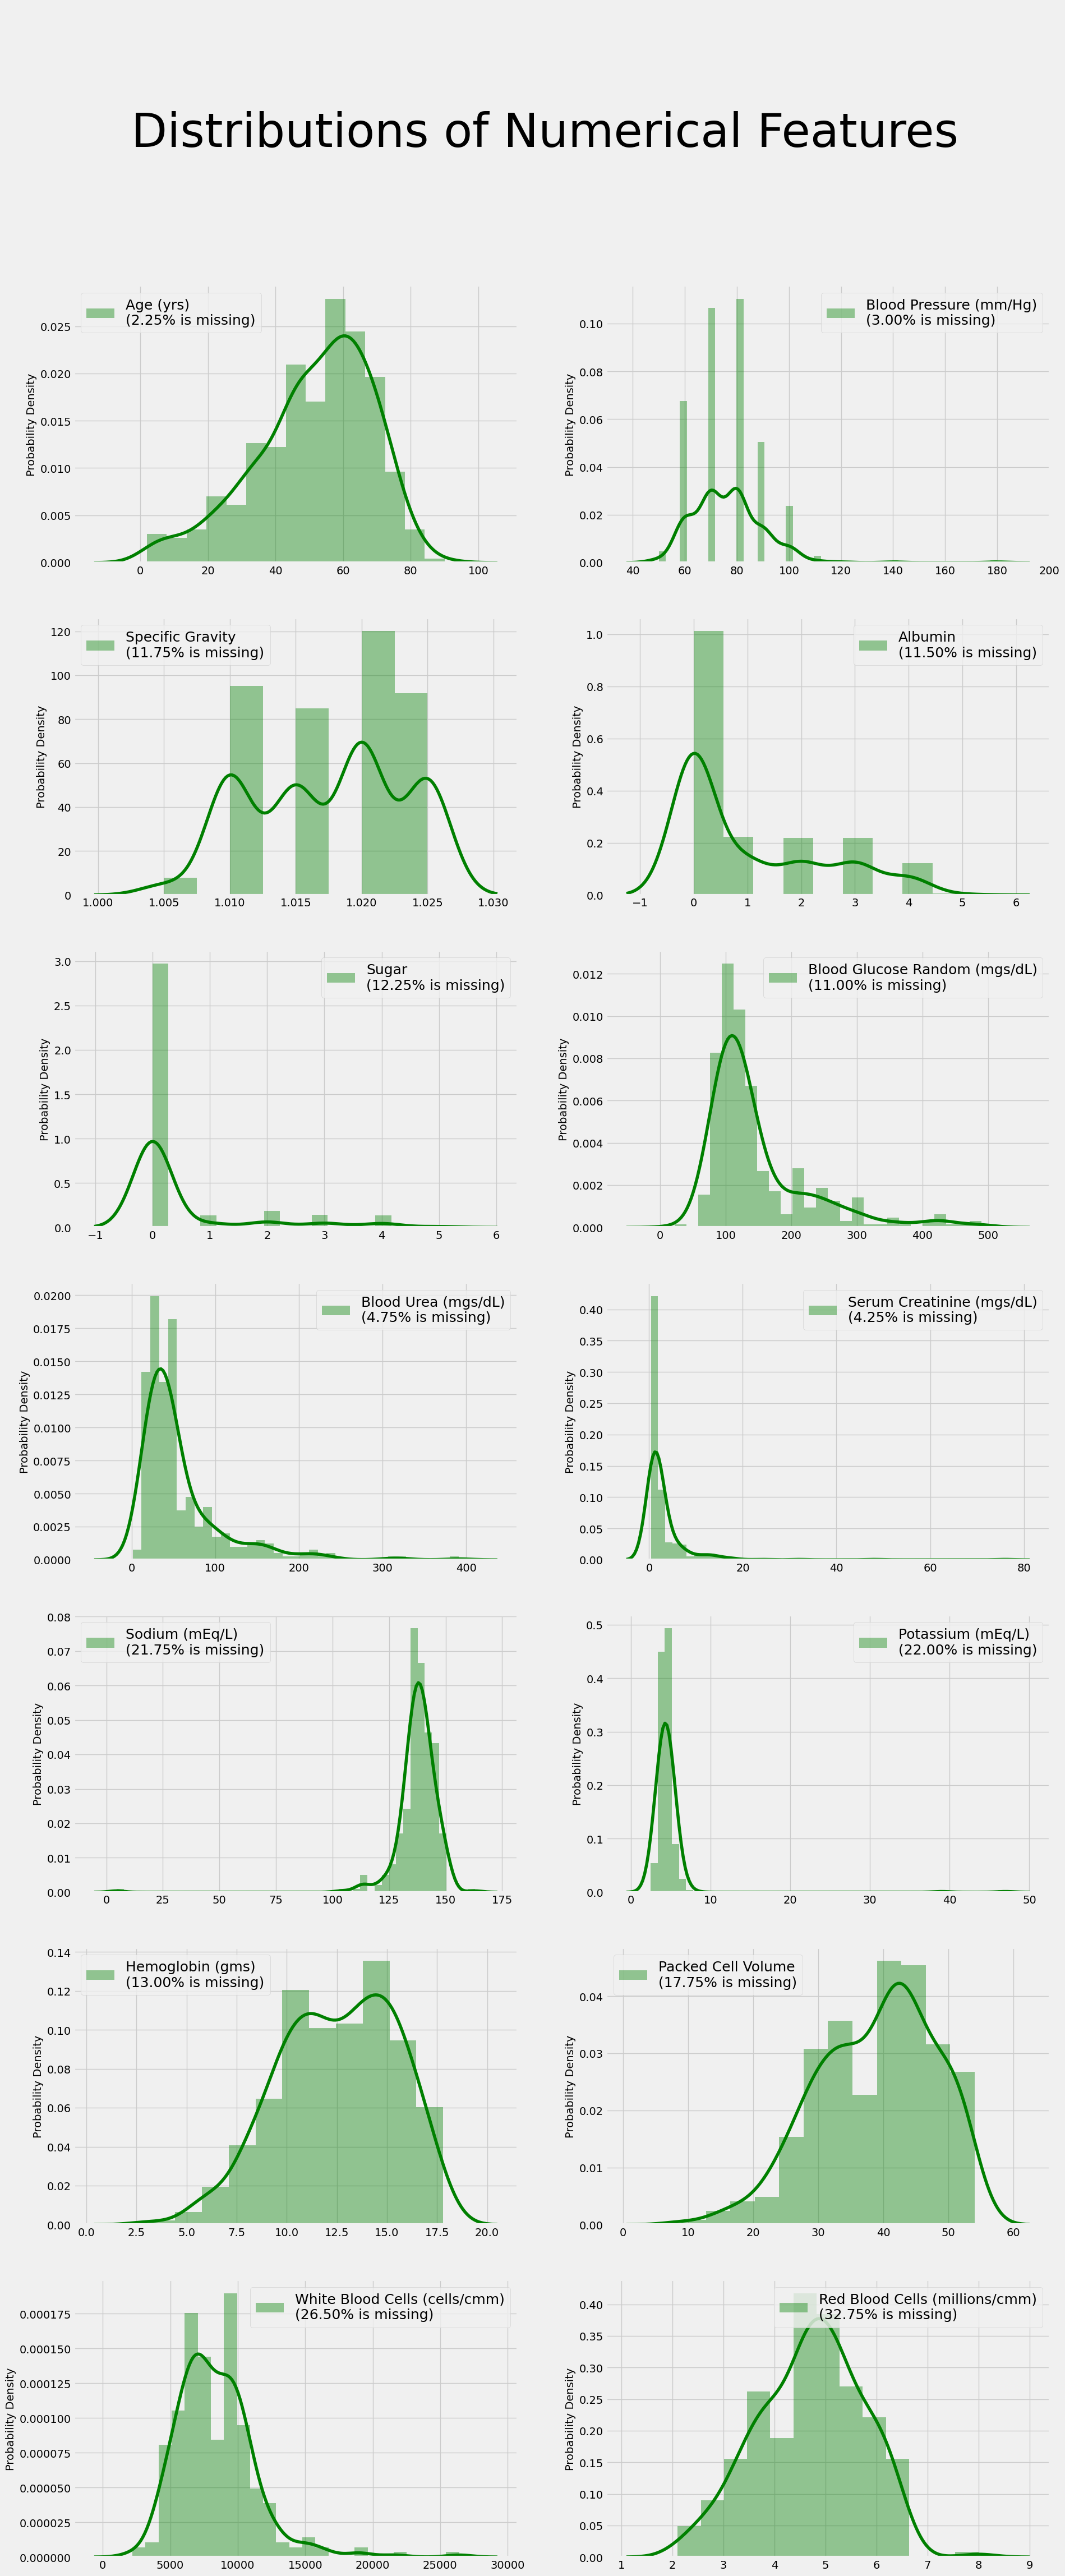

In [ ]:
n_rows, n_cols = (7,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 50))
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=60)

for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    
    miss_perc="%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig=sns.distplot(data[column], color="g", label=collabel, norm_hist=True,
    
    ax=axes[i,j], kde_kws={"lw":4})
    
    fig=fig.legend(loc='best', fontsize=18)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    axes[i,j].set_xlabel(None)

plt.show()

In [ ]:
style.use('seaborn-darkgrid')

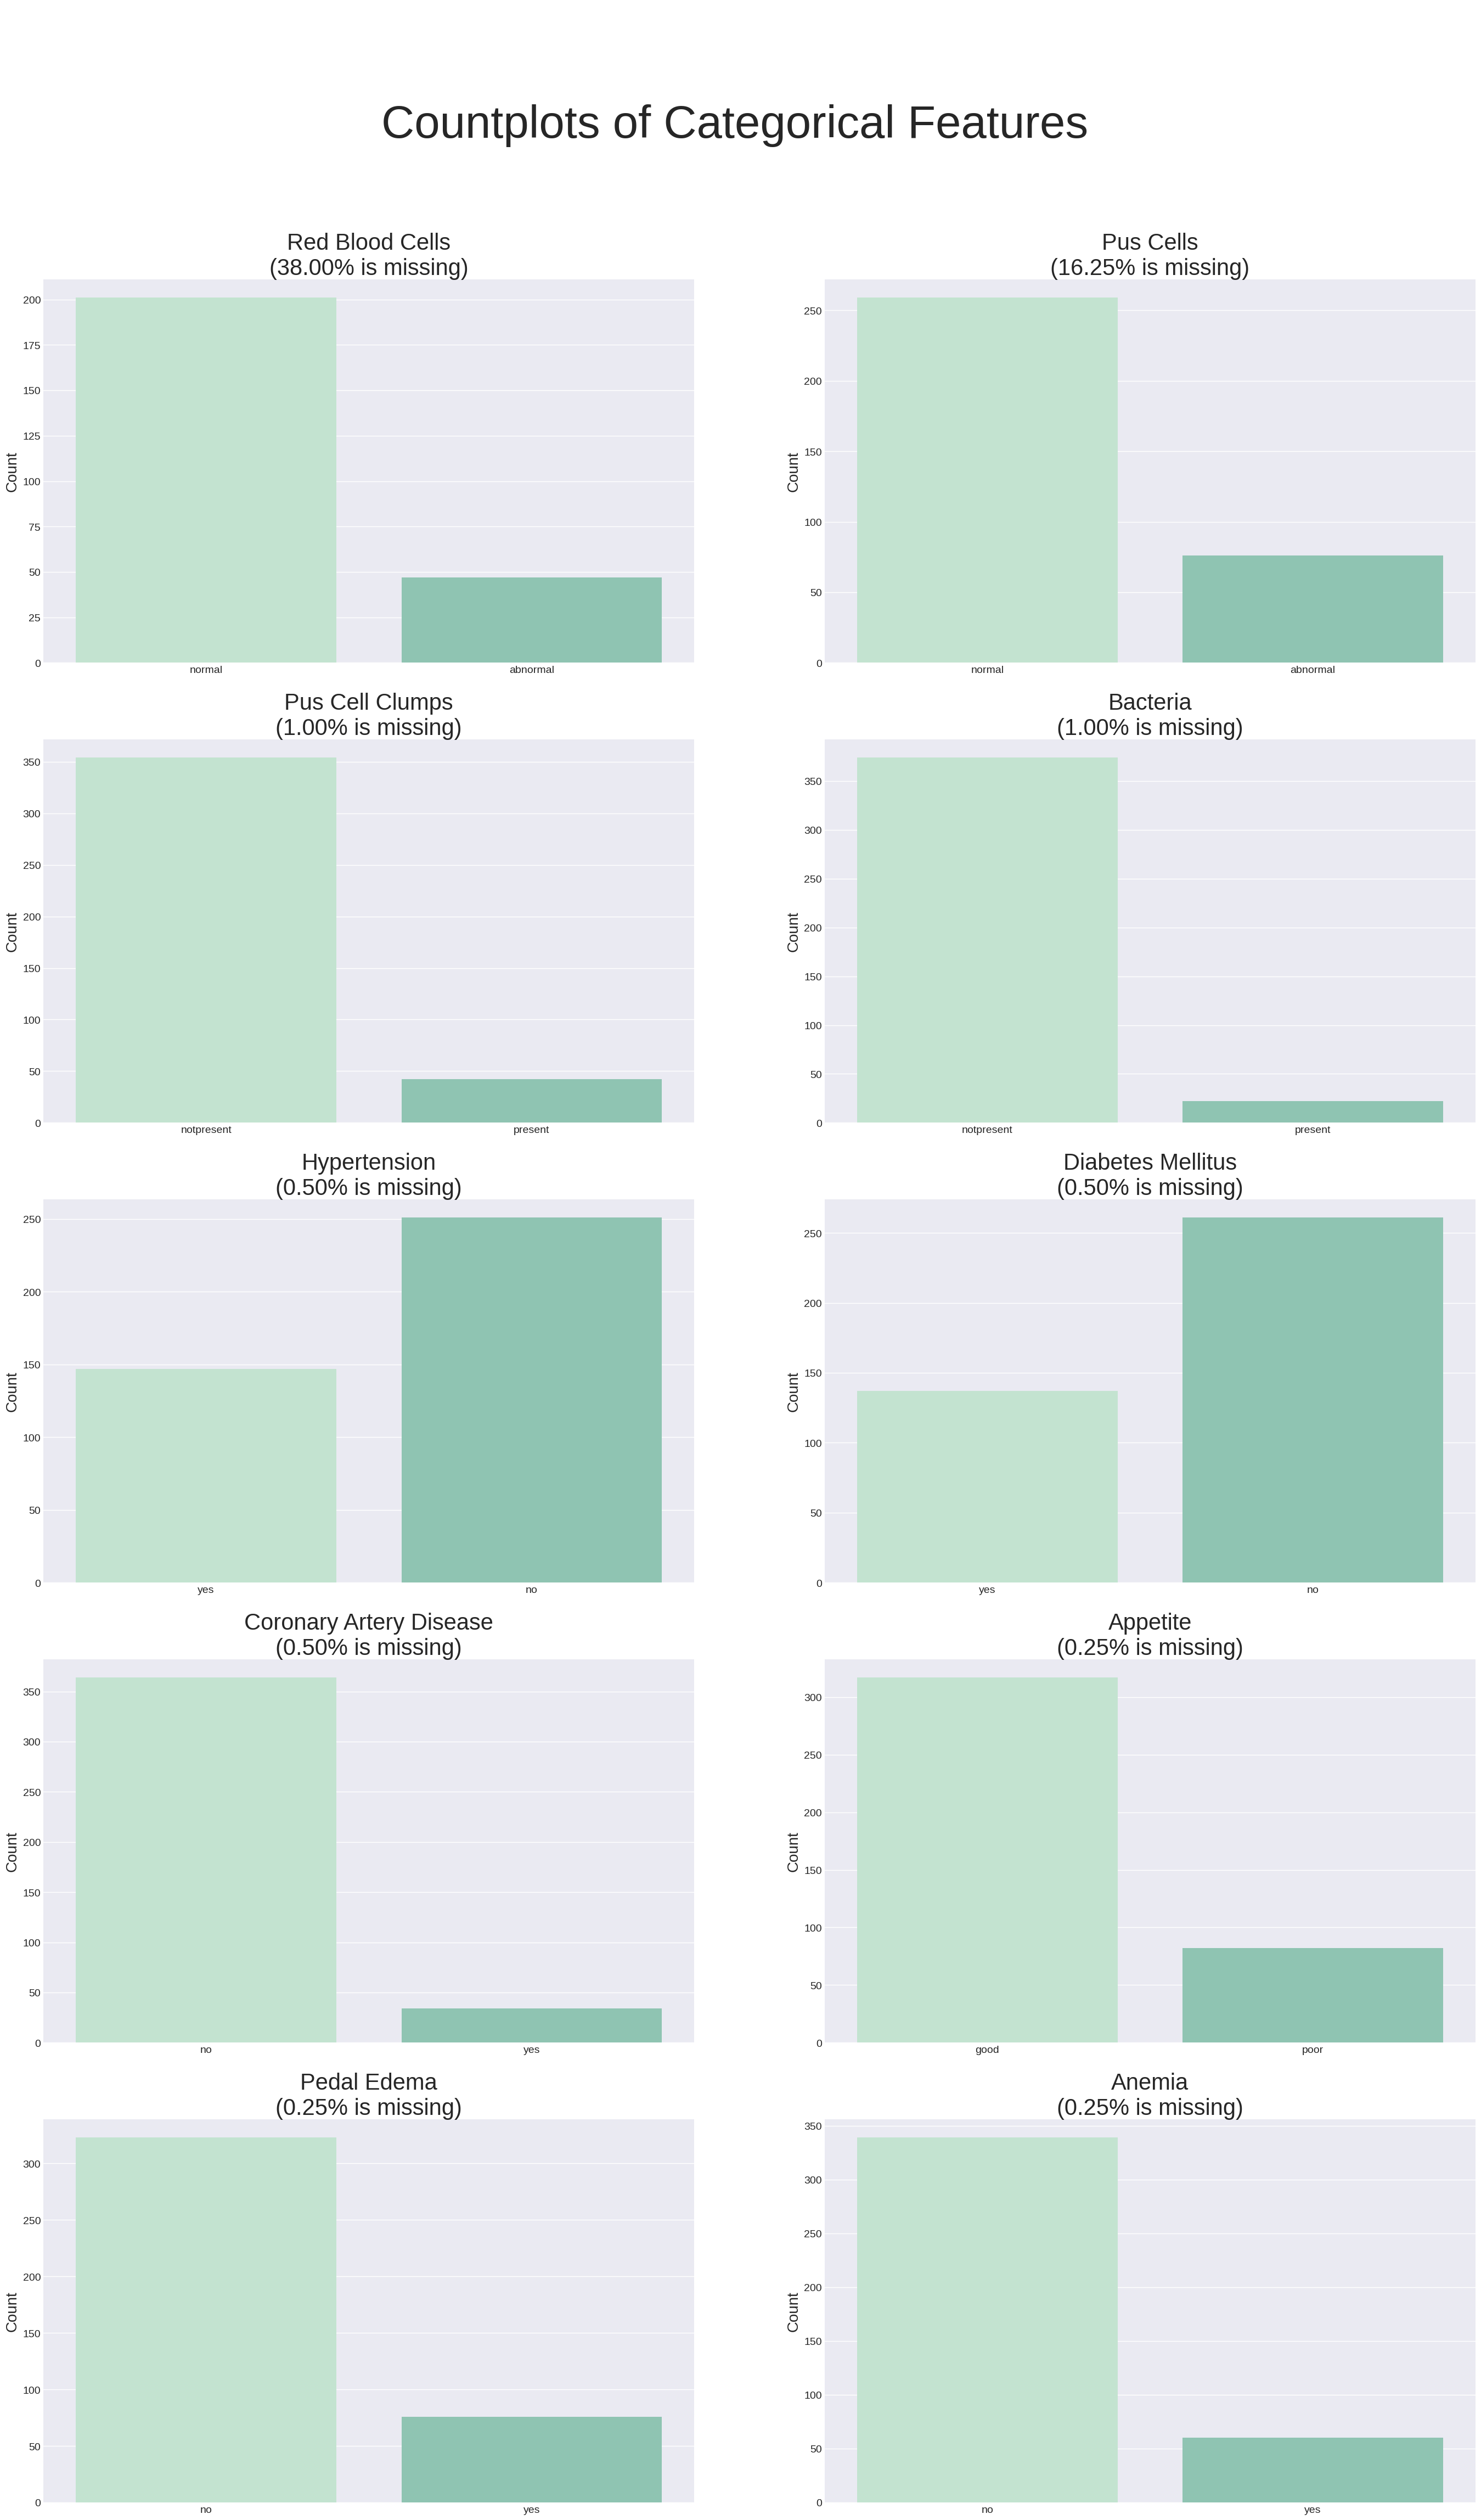

In [ ]:
n_rows, n_cols = (5,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 50))
figure.suptitle('\n\nCountplots of Categorical Features', fontsize=60)

for index, column in enumerate(categoricals):
    
    i,j = index // n_cols, index % n_cols
    
    miss_perc="%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig = sns.countplot(x=column, data=data,label=collabel, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1),
    
    ax=axes[i,j])
    
    axes[i,j].set_title(collabel,fontsize=30)
    
    axes[i,j].set_xlabel(None)
    
    axes[i,j].set_ylabel("Count",fontsize=20)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels())

plt.show()

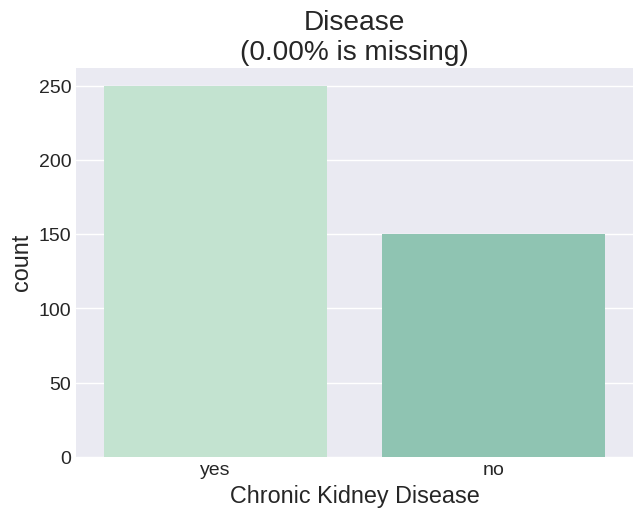

In [ ]:
miss_perc="%.2f"%(100*(1-(data['Chronic Kidney Disease'].dropna().shape[0])/data.shape[0]))
    
label="Disease\n(missing:\n{}%)".format(miss_perc)
fig=sns.countplot(x=data['Chronic Kidney Disease'],label=label, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1))
plt.title("Disease\n({}% is missing)".format(miss_perc))
plt.show()

In [ ]:
onehotdata=pd.get_dummies(data,drop_first=True,prefix_sep=': ')
onehotdata.head()

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
0       48.0                    80.0             1.020      1.0    0.0   
1        7.0                    50.0             1.020      4.0    0.0   
2       62.0                    80.0             1.010      2.0    3.0   
3       48.0                    70.0             1.005      4.0    0.0   
4       51.0                    80.0             1.010      2.0    0.0   

   Blood Glucose Random (mgs/dL)  Blood Urea (mgs/dL)  \
0                          121.0                 36.0   
1                            NaN                 18.0   
2                          423.0                 53.0   
3                          117.0                 56.0   
4                          106.0                 26.0   

   Serum Creatinine (mgs/dL)  Sodium (mEq/L)  Potassium (mEq/L)  ...  \
0                        1.2             NaN                NaN  ...   
1                        0.8             NaN                NaN  ...   
2                        1.8             NaN                NaN  ...   
3                        3.8           111.0                2.5  ...   
4                        1.4             NaN                NaN  ...   

   Pus Cells: normal  Pus Cell Clumps: present  Bacteria: present  \
0                  1                         0                  0   
1                  1                         0                  0   
2                  1                         0                  0   
3                  0                         1                  0   
4                  1                         0                  0   

   Hypertension: yes  Diabetes Mellitus: yes  Coronary Artery Disease: yes  \
0                  1                       1                             0   
1                  0                       0                             0   
2                  0                       1                             0   
3                  1                       0                             0   
4                  0                       0                             0   

   Appetite: poor  Pedal Edema: yes  Anemia: yes  Chronic Kidney Disease: yes  
0               0                 0            0                            1  
1               0                 0            0                            1  
2               1                 0            1                            1  
3               1                 1            1                            1  
4               0                 0            0                            1  

[5 rows x 25 columns]

In [ ]:
names={}
for name in data.columns:
    for ohname in onehotdata.columns:
        if name+': ' in ohname and name in categoricals:
            names[name]=ohname
            for i in range(400):
                if type(data.loc[i,name])!=str:
                    if math.isnan(data.loc[i,name]):
                        onehotdata.loc[i,ohname]=data.loc[i,name]

In [ ]:
test_oh_dt=pd.DataFrame(columns=data.columns)
for col in test_oh_dt.columns:
    if col in categoricals:
        test_oh_dt[col]=onehotdata[names[col]]
    elif col=='Chronic Kidney Disease':
        test_oh_dt[col]=onehotdata['Chronic Kidney Disease: yes']
    else:
        test_oh_dt[col]=onehotdata[col]

In [ ]:
((pd.isna(data)==pd.isna(test_oh_dt))==False).sum()

Age (yrs)                         0
Blood Pressure (mm/Hg)            0
Specific Gravity                  0
Albumin                           0
Sugar                             0
Red Blood Cells                   0
Pus Cells                         0
Pus Cell Clumps                   0
Bacteria                          0
Blood Glucose Random (mgs/dL)     0
Blood Urea (mgs/dL)               0
Serum Creatinine (mgs/dL)         0
Sodium (mEq/L)                    0
Potassium (mEq/L)                 0
Hemoglobin (gms)                  0
Packed Cell Volume                0
White Blood Cells (cells/cmm)     0
Red Blood Cells (millions/cmm)    0
Hypertension                      0
Diabetes Mellitus                 0
Coronary Artery Disease           0
Appetite                          0
Pedal Edema                       0
Anemia                            0
Chronic Kidney Disease            0
dtype: int64

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
NQT=QuantileTransformer(output_distribution='normal')
UQT=QuantileTransformer(output_distribution='uniform')
NSPT=PowerTransformer(standardize=False) #I'll feed its output to a normalizer and see if that makes any difference.
SPT=PowerTransformer()
RS=RobustScaler() #default
WRS=RobustScaler(quantile_range=(15,85)) # a "wider" range
SS=StandardScaler()

Transformers=[NQT,UQT,NSPT,SPT,RS,WRS,SS]
MMS=MinMaxScaler()

Pipes=[] #they're not actually pipelines, except for one,
#but initially I was going to normalize all of them, and didn't bother to change the name later
for tr in Transformers:
    p=make_pipeline(tr)
    Pipes.append(p)
Pipes[2]=make_pipeline(NSPT,MMS)

In [ ]:
for pipe in Pipes:
    print(pipe)

Pipeline(steps=[('quantiletransformer',
                 QuantileTransformer(output_distribution='normal'))])
Pipeline(steps=[('quantiletransformer', QuantileTransformer())])
Pipeline(steps=[('powertransformer', PowerTransformer(standardize=False)),
                ('minmaxscaler', MinMaxScaler())])
Pipeline(steps=[('powertransformer', PowerTransformer())])
Pipeline(steps=[('robustscaler', RobustScaler())])
Pipeline(steps=[('robustscaler', RobustScaler(quantile_range=(15, 85)))])
Pipeline(steps=[('standardscaler', StandardScaler())])


In [ ]:
datarrays=[]
for pipe in Pipes:
    arr=pipe.fit_transform(onehotdata)
    datarrays.append(arr)

In [ ]:
dataframes=[onehotdata]
for arr in datarrays:
    df=pd.DataFrame(arr,columns=onehotdata.columns)
    dataframes.append(df)

In [ ]:
style.use('fivethirtyeight')

In [ ]:
categorical_feats=onehotdata.columns[14:]
numerical_feats=onehotdata.columns[:14]

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
knnimp=KNNImputer(weights='distance', n_neighbors=8)

In [ ]:
rrr=[onehotdata.to_numpy()]
for dfi in range(1,len(dataframes)):
    rrr.append(knnimp.fit_transform(dataframes[dfi]))

In [ ]:
arrs=[rrr[0]]
for i in range(1,len(rrr)):
    arrs.append(Pipes[i-1].inverse_transform(rrr[i]))

In [ ]:
impdf=[]
for i in range(len(arrs)):
    impdf.append(pd.DataFrame(arrs[i],columns=onehotdata.columns))

In [ ]:
impdf[6].iloc[:,15].unique()

array([1.        , 0.        , 0.63160166, 0.88607326, 0.61387208,
       0.75862137, 0.70806966, 0.86137172, 0.63119148, 0.89543788,
       0.74179684, 0.77161848, 0.61793009, 0.82398101, 0.75406756,
       0.36706328, 0.5835219 , 0.74235729, 0.87901676, 0.64341621,
       0.36860117, 0.78812957, 0.45736785, 0.74810413, 0.73289946,
       0.88144675, 0.75573017, 0.51257409, 0.89459771, 0.2498657 ,
       0.89557894, 0.7636394 , 0.75378168, 0.89316823, 0.76532431,
       0.83814399, 0.5902046 , 0.88189939, 0.6411361 , 0.74195041,
       0.82964032, 0.86885068, 0.63890626, 0.48569735, 0.88566203,
       0.77744959, 0.63198161, 0.73726093, 0.61095653, 0.62328647,
       0.67830806, 0.71205989, 0.78204737, 0.40201877, 0.48129177])

In [ ]:
test=impdf.copy()
for j in range(1,8):
    dat=test[j]
    for i in range(14,25):
        col=dat.iloc[:,i]
        for k in range(400):
            if col[k]>=0.5:
                col[k]=1
            else:
                col[k]=0

In [ ]:
test[6].iloc[:,16].unique()

array([0., 1.])

In [ ]:
impdf=test

In [ ]:
fwmmv=list(numerical_feats.copy())
the_other_ones=['Age (yrs)','Blood Pressure (mm/Hg)','Serum Creatinine (mgs/dL)','Blood Urea (mgs/dL)']
for f in range(len(the_other_ones)):
    if the_other_ones[f] in fwmmv:
        fwmmv.remove(the_other_ones[f])
fwmmv.extend(('Red Blood Cells: normal','Pus Cells: normal'))

In [ ]:
fwmmv #features with many missing values

['Specific Gravity',
 'Albumin',
 'Sugar',
 'Blood Glucose Random (mgs/dL)',
 'Sodium (mEq/L)',
 'Potassium (mEq/L)',
 'Hemoglobin (gms)',
 'Packed Cell Volume',
 'White Blood Cells (cells/cmm)',
 'Red Blood Cells (millions/cmm)',
 'Red Blood Cells: normal',
 'Pus Cells: normal']

In [ ]:
indices=[1,6,7]

In [ ]:
onehotdata=impdf[1].copy()

In [ ]:
onehotdata.dropna().shape

(400, 25)

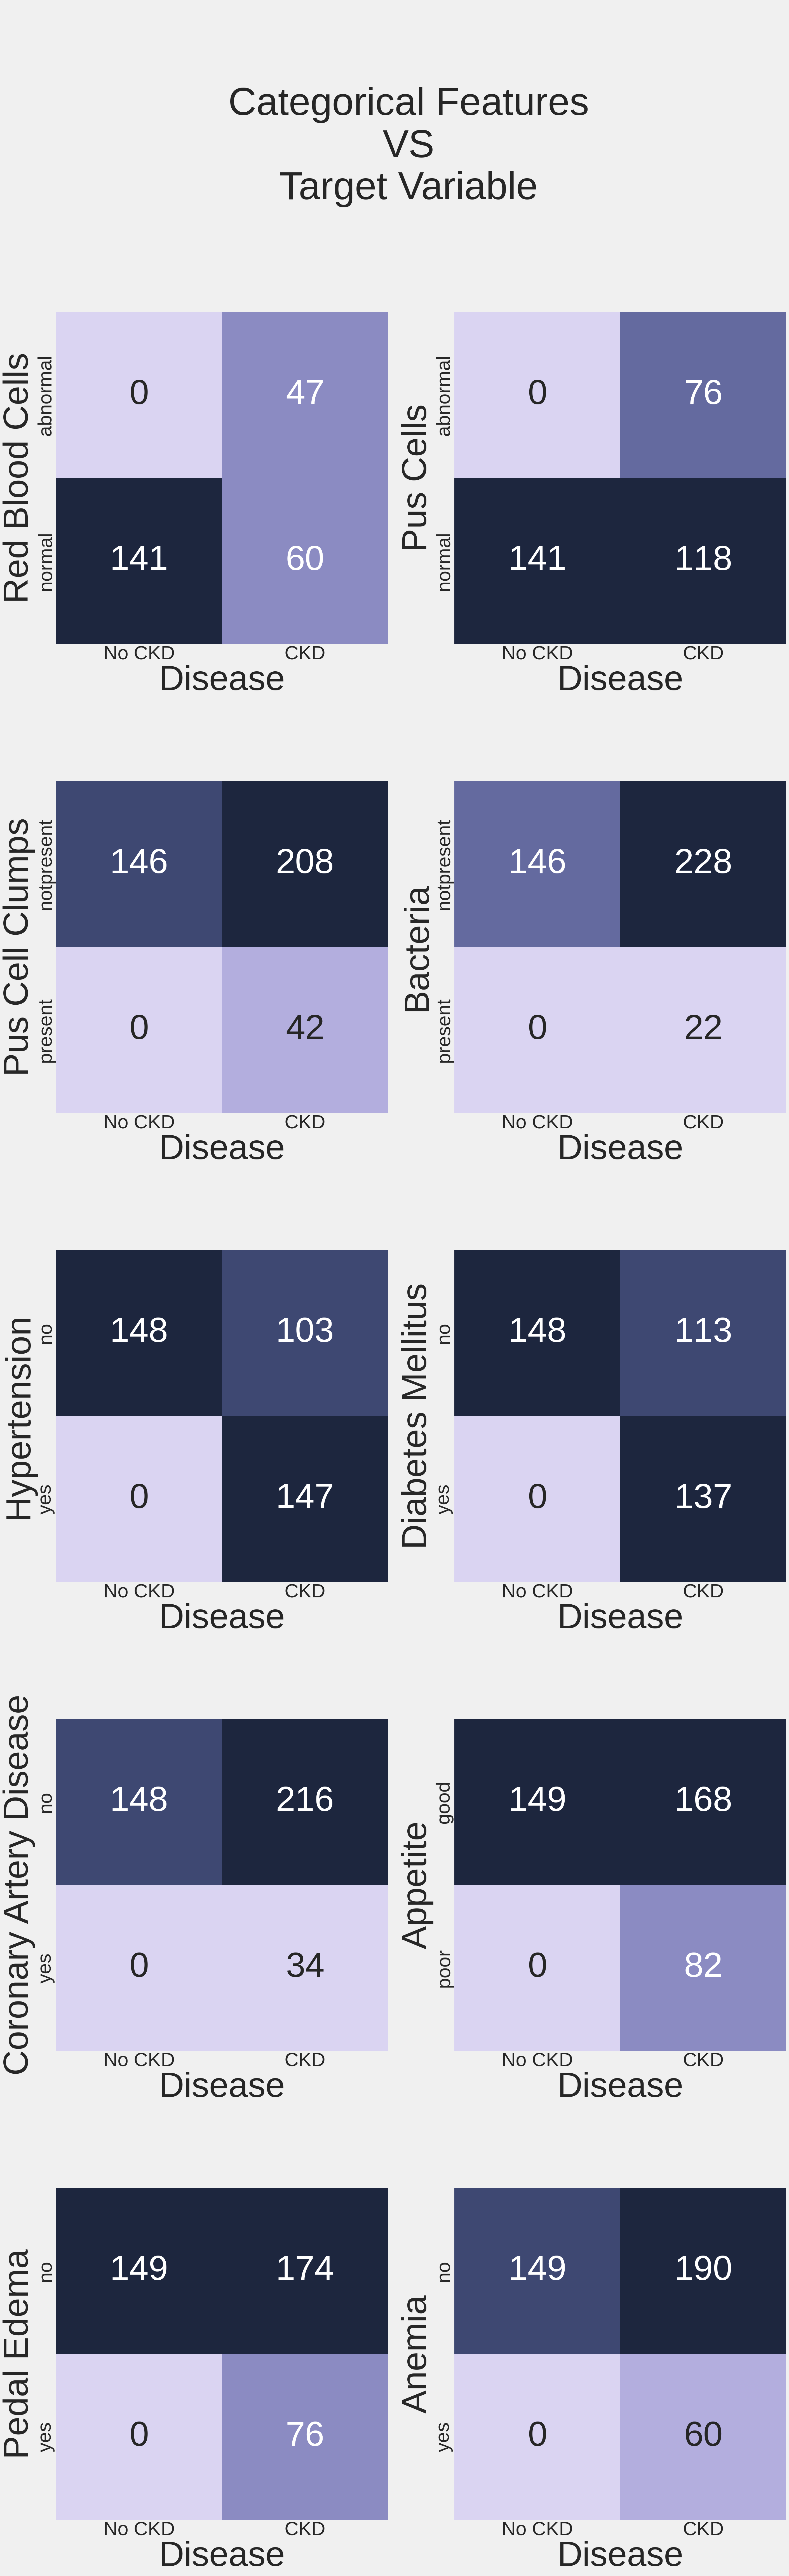

In [ ]:
n_rows, n_cols = (5,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 100))
figure.suptitle('\n\nCategorical Features\nVS\nTarget Variable', fontsize=100)

for index, column in enumerate(categoricals):
    
    i,j = (index // n_cols), (index % n_cols)
    
    sns.heatmap(pd.crosstab(data[column],data['Chronic Kidney Disease']),
                ax=axes[i,j],
                cmap=sns.cubehelix_palette(start=2.8, rot=.1),
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':90},
                fmt='d')
        
    axes[i,j].set_xlabel("Disease", fontsize=90)

    axes[i,j].set_ylabel(column,fontsize=90)
    
    axes[i,j].set_yticklabels(axes[i,j].get_yticklabels(),fontsize=50)
    
    axes[i,j].set_xticklabels(["No CKD","CKD"],fontsize=50)

plt.show()


In [ ]:
X=onehotdata.drop("Chronic Kidney Disease: yes",axis=1,inplace=False)
Y=onehotdata["Chronic Kidney Disease: yes"]

In [ ]:
full_scaled_data=SS.fit_transform(onehotdata)
scaled_data=SS.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans

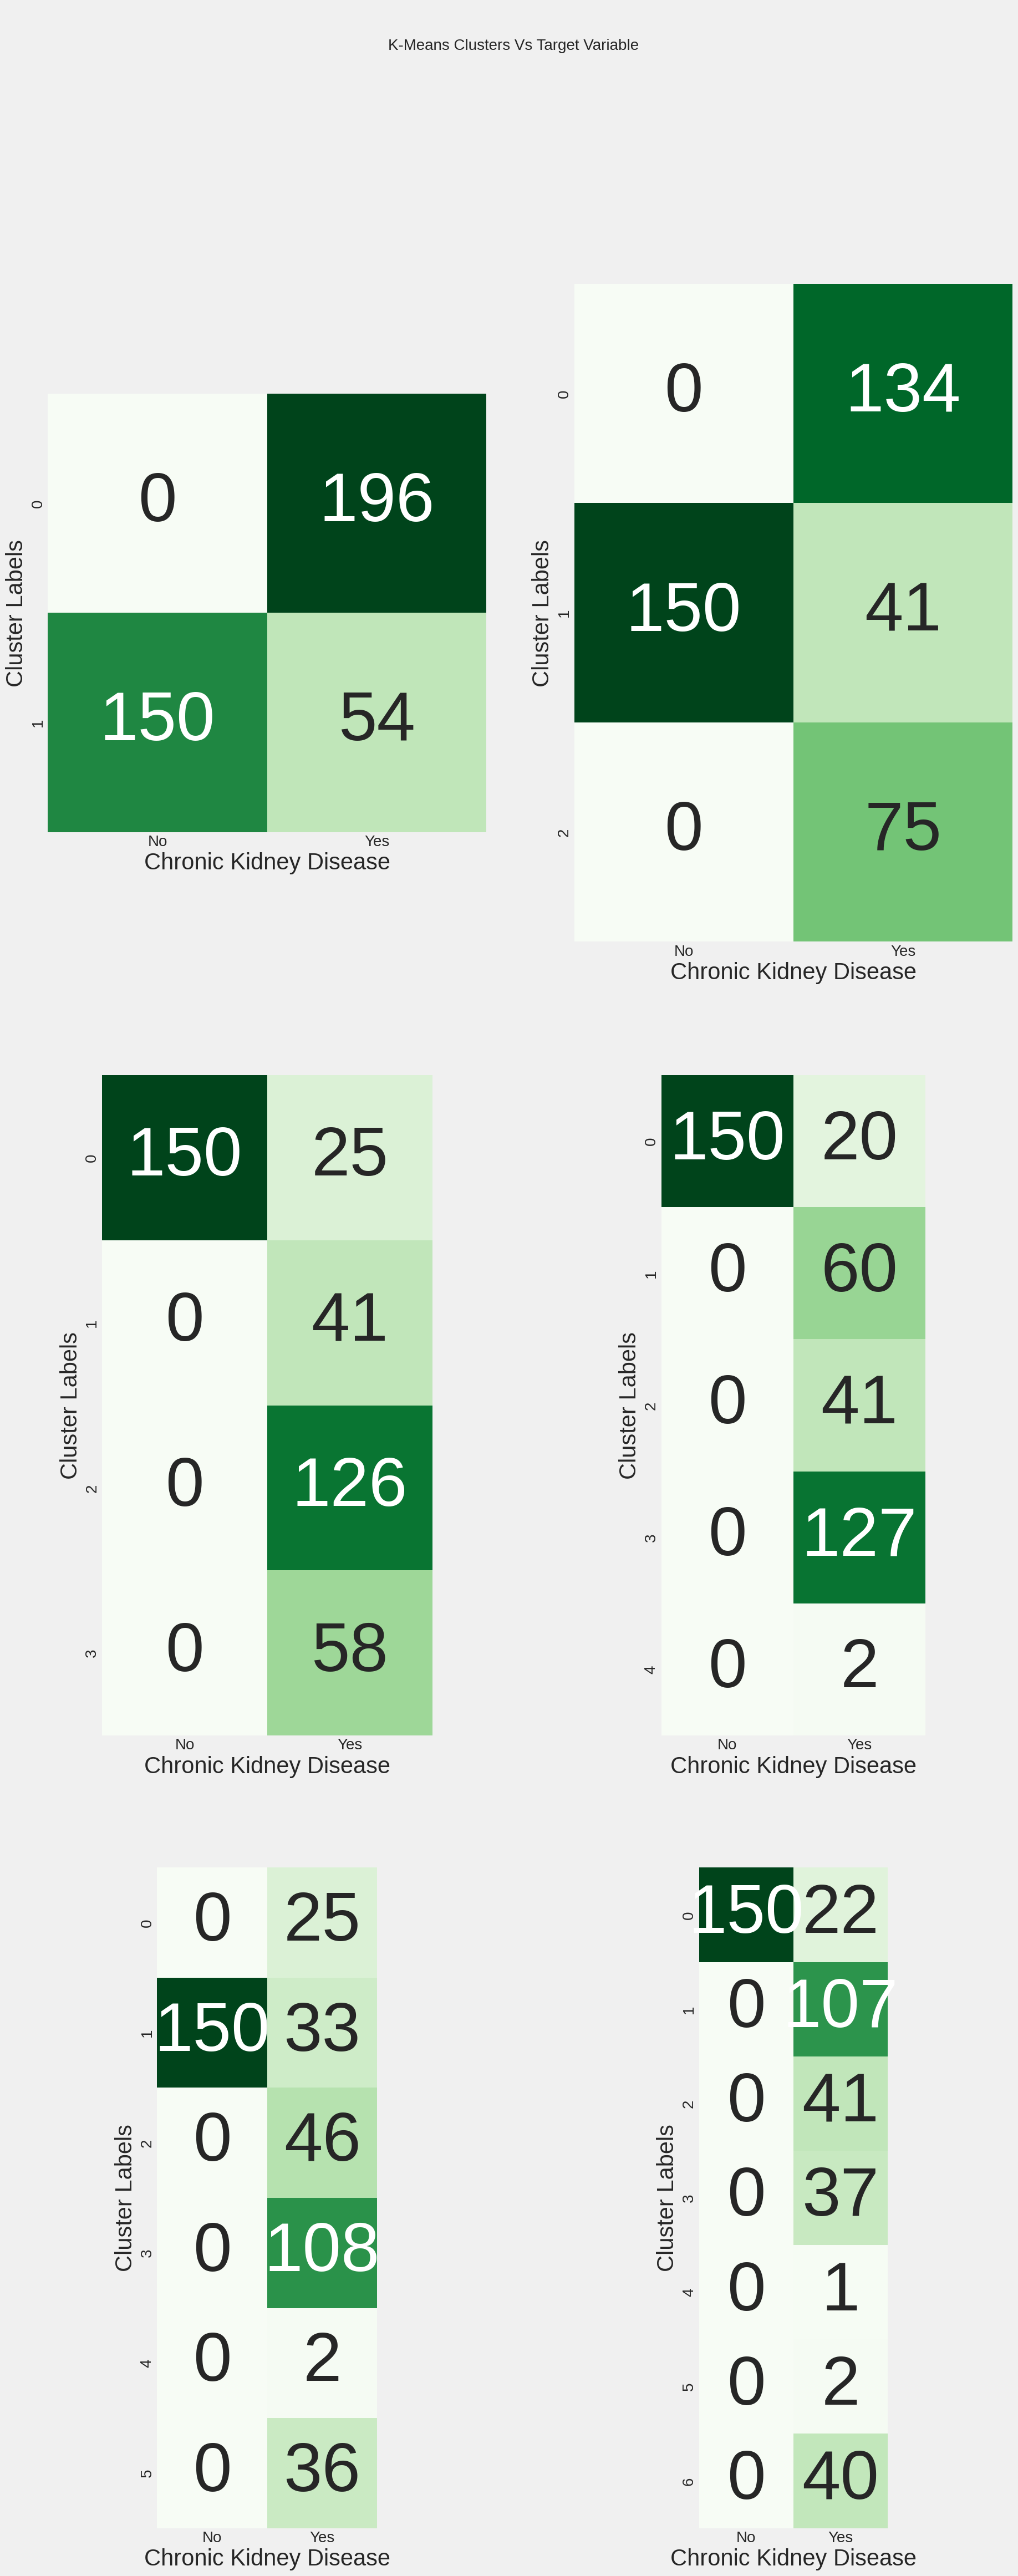

In [ ]:
n_rows, n_cols = (3,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 50))
figure.suptitle('\n\nK-Means Clusters Vs Target Variable', fontsize=20)

for index in range(6):
    
    i,j = (index // n_cols), (index % n_cols)
    
    model=KMeans(n_clusters=index+2)
    
    model.fit(scaled_data)
    
    cluster_labels=model.predict(scaled_data)
    
    sns.heatmap(pd.crosstab(cluster_labels,Y),
                ax=axes[i,j],
                cmap='Greens',
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':90},
                fmt='d')
    
    axes[i,j].set_xlabel("Chronic Kidney Disease",fontsize=30)

    axes[i,j].set_ylabel("Cluster Labels",fontsize=30)
    
    axes[i,j].set_yticklabels(axes[i,j].get_yticklabels(),fontsize=20)
    
    axes[i,j].set_xticklabels(["No","Yes"],fontsize=20)
plt.show()

In [ ]:
from sklearn.manifold import TSNE

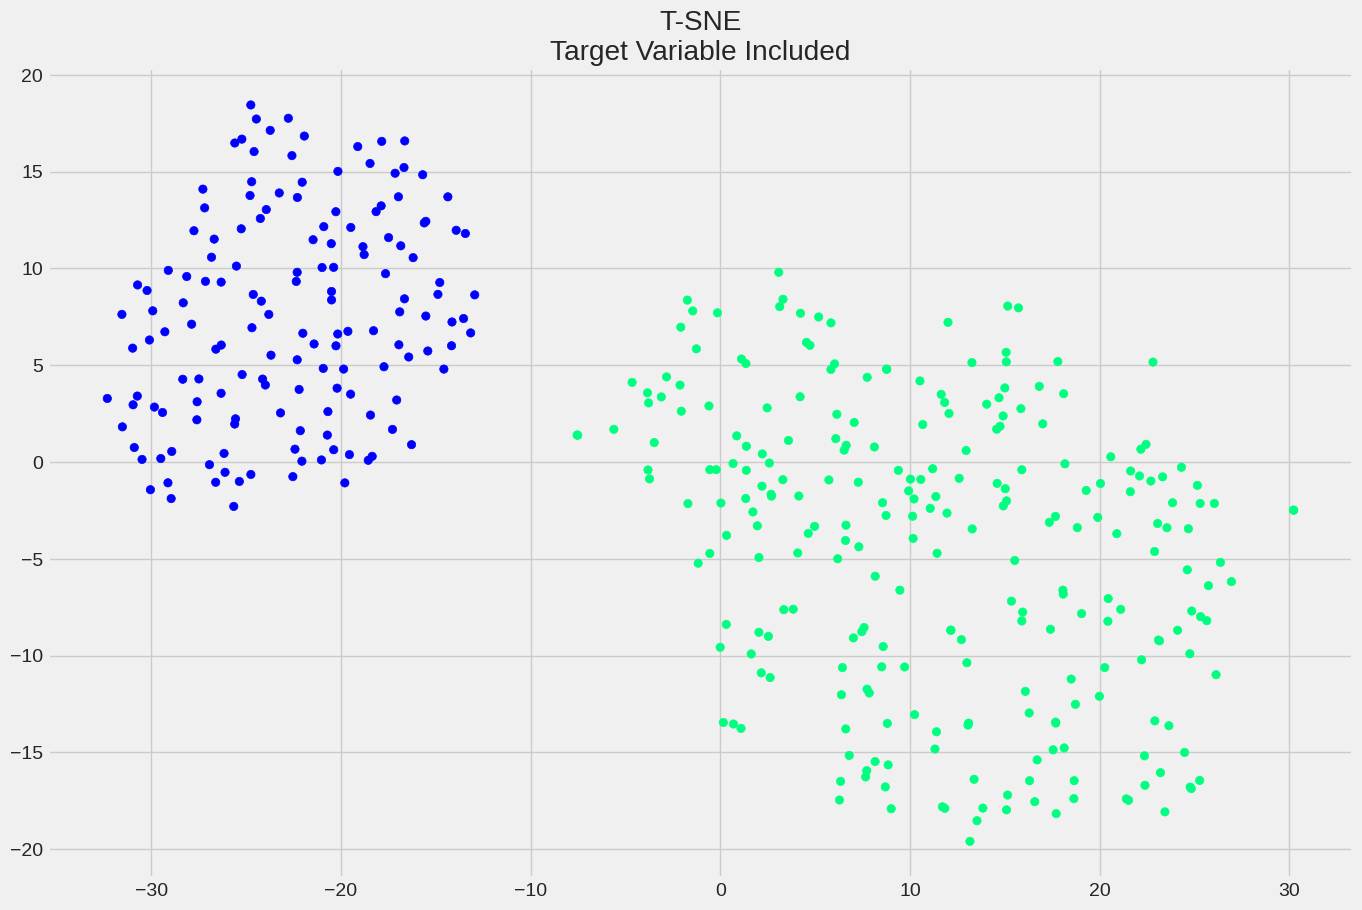

In [ ]:
tsne_model = TSNE()
tsne_data= tsne_model.fit_transform(full_scaled_data)
xs=tsne_data[:,0]
ys=tsne_data[:,1]
plt.figure(figsize=(15,10))
plt.scatter(xs,ys,c=pd.get_dummies(onehotdata['Chronic Kidney Disease: yes'],drop_first=True).values,cmap="winter")
plt.title("T-SNE\nTarget Variable Included")
plt.show()

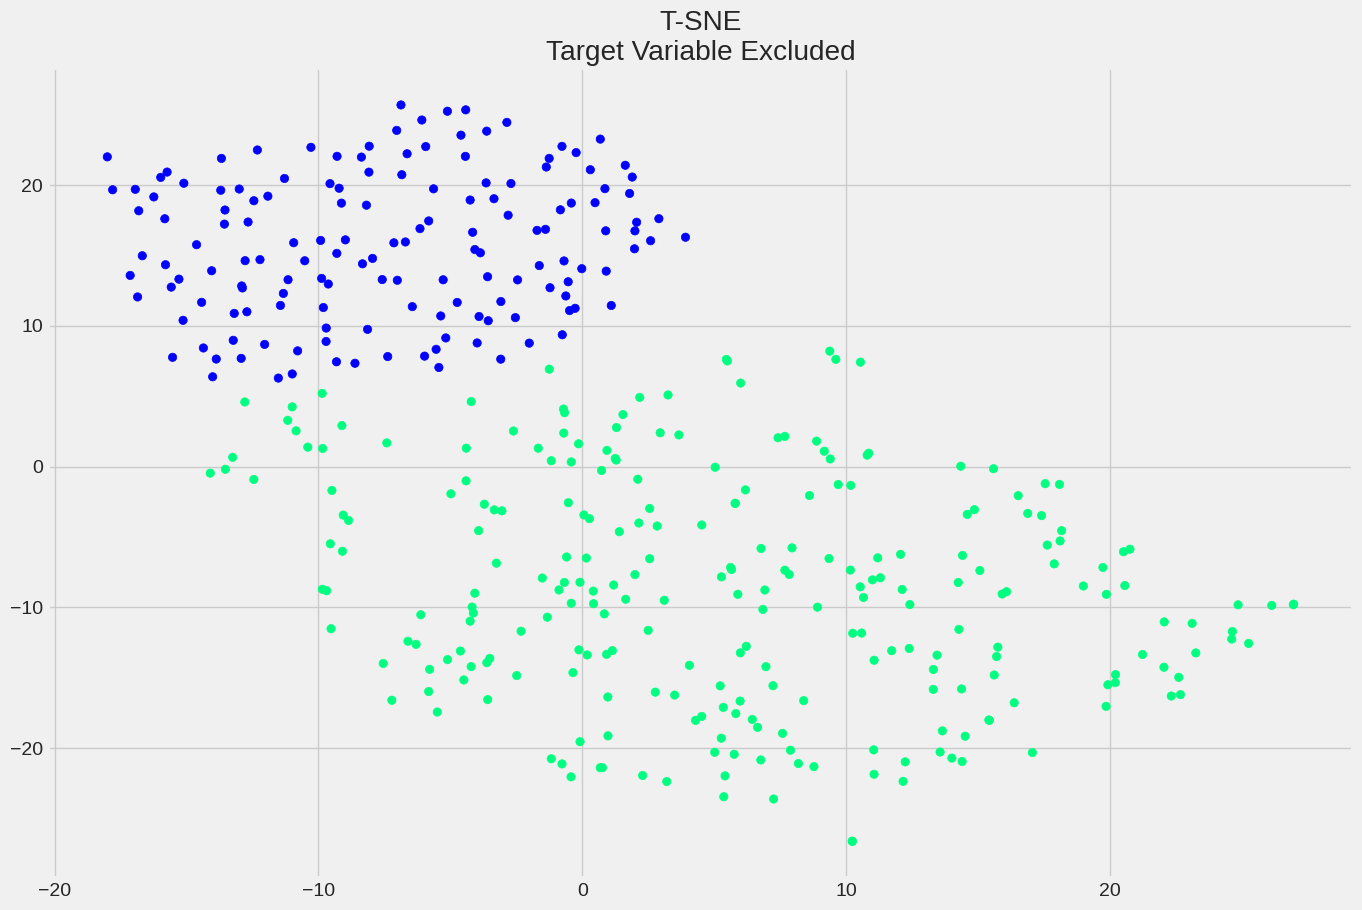

In [ ]:
tsne_data= tsne_model.fit_transform(scaled_data)
xs=tsne_data[:,0]
ys=tsne_data[:,1]
plt.figure(figsize=(15,10))
plt.scatter(xs,ys,c=pd.get_dummies(Y,drop_first=True).values,cmap="winter")
plt.title("T-SNE\nTarget Variable Excluded")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)

PCA()

In [ ]:
pca_features=list(range(1,25))

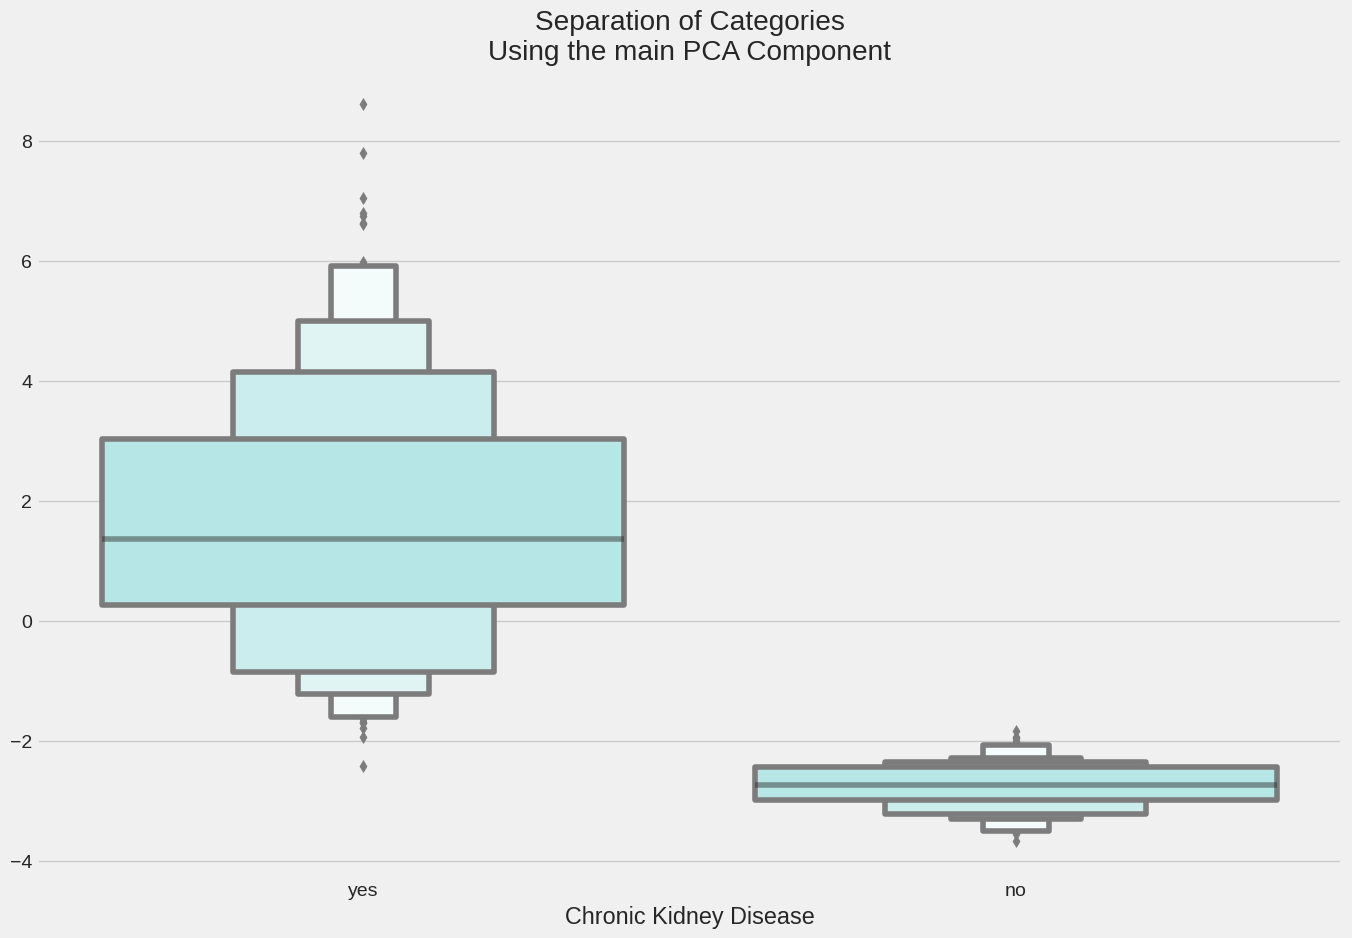

In [ ]:
pca1=PCA(n_components=1)
pca1_data=pca1.fit_transform(scaled_data)
plt.figure(figsize=(15,10))
pca1_data=pca1_data.reshape((400,))
bp=sns.boxenplot(y=pca1_data, x=data['Chronic Kidney Disease'], color="paleturquoise",showfliers=True)
plt.title("Separation of Categories\nUsing the main PCA Component")
plt.show()

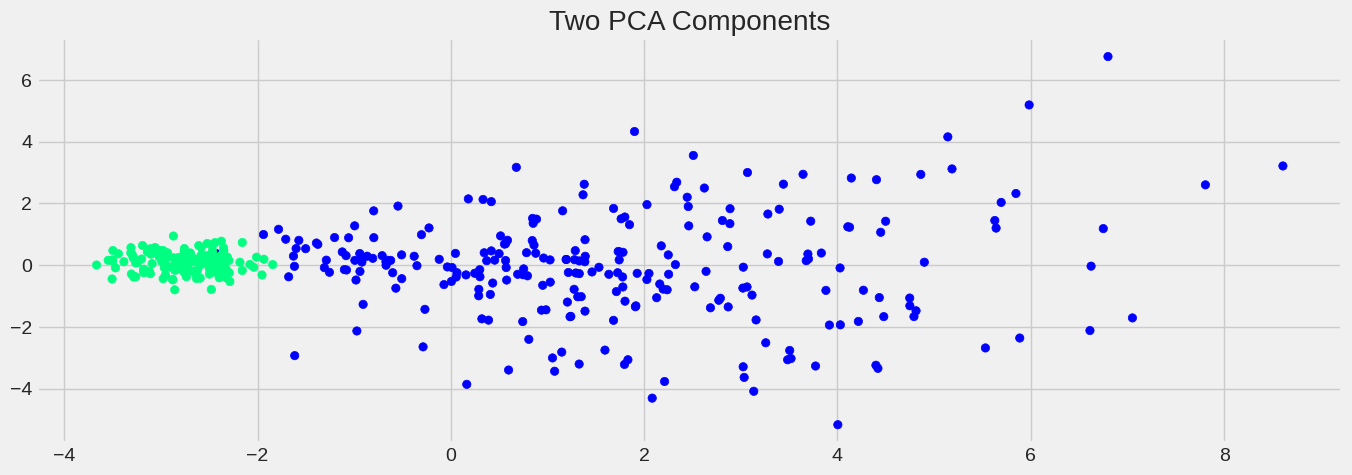

In [ ]:
pca2=PCA(n_components=2)
pca2_data=pca2.fit_transform(scaled_data)
plt.figure(figsize=(15,5))
plt.scatter(pca2_data[:,0],pca2_data[:,1],c=onehotdata["Chronic Kidney Disease: yes"],cmap="winter_r")
plt.title('Two PCA Components')
plt.show()

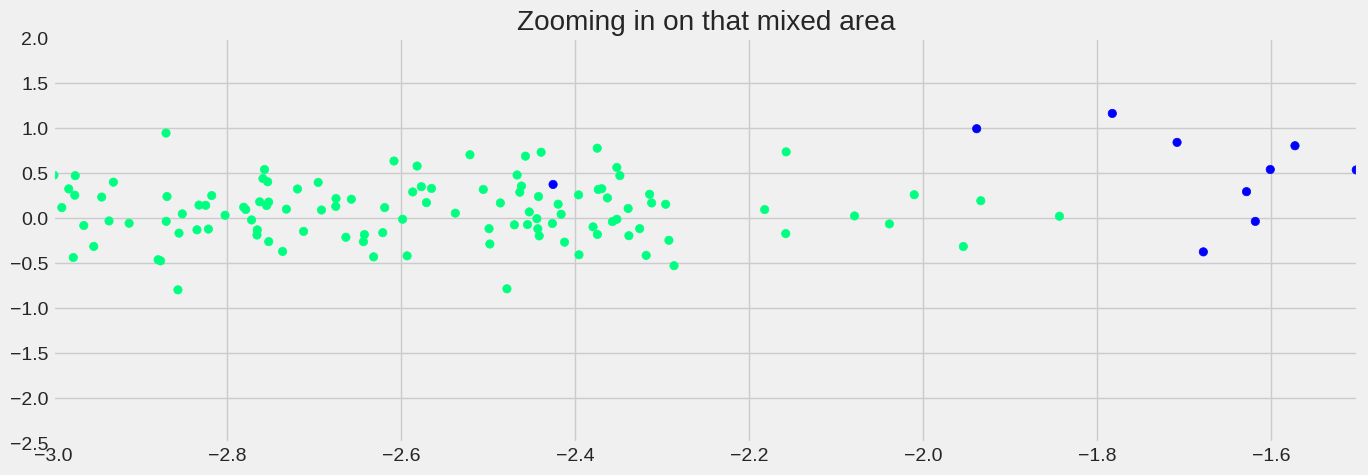

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(pca2_data[:,0],pca2_data[:,1],c=onehotdata["Chronic Kidney Disease: yes"],cmap="winter_r")
plt.xlim(right=-1.5,left=-3)
plt.ylim(bottom=-2.5,top=2)
plt.title("Zooming in on that mixed area")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, Y, test_size=0.4, random_state=12)

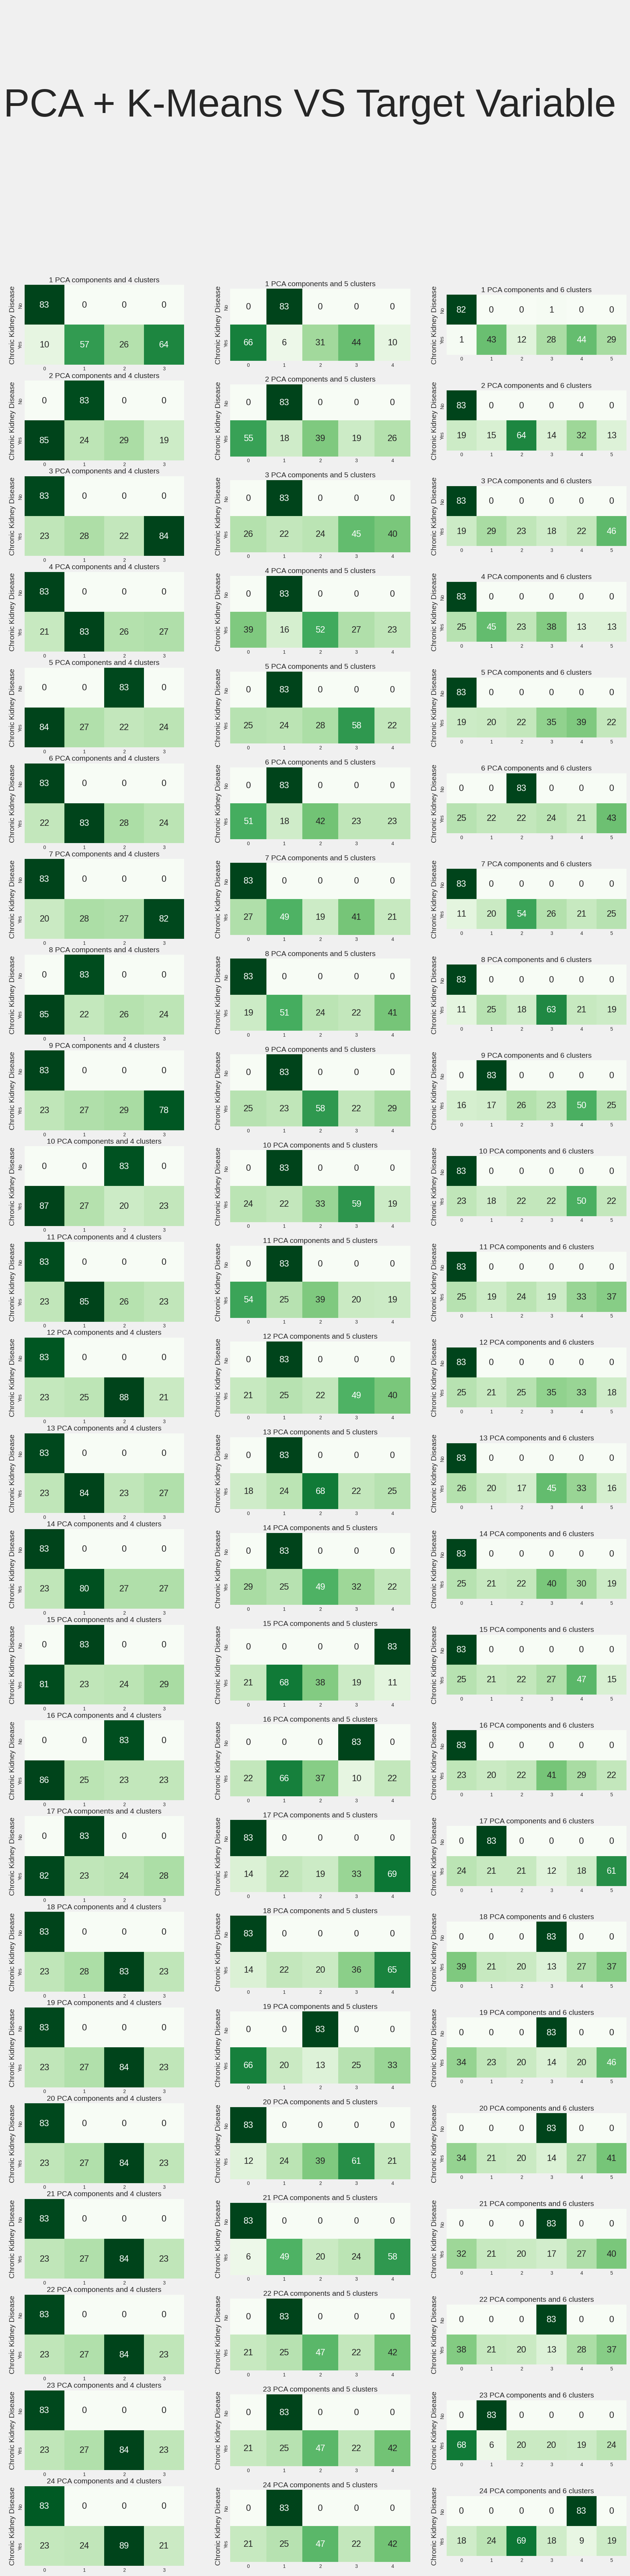

In [ ]:
n_rows, n_cols = (24,3)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 80))

figure.suptitle('\n\nPCA + K-Means VS Target Variable\n', fontsize=80)

for index in range(72):
    
    i,j = (index // n_cols), (index % n_cols)
    
    pca = PCA(n_components=i+1)
    
    pca_data=pca.fit_transform(X_train)
    
    model=KMeans(n_clusters=j+4, random_state=5) #random_state is arbitrary,
                                                    
    
    model.fit(pca_data)
    
    cluster_labels=model.predict(pca_data)
    
    sns.heatmap(pd.crosstab(Y_train,cluster_labels),
                ax=axes[i,j],
                cmap='Greens',
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':18},
                fmt='d')
    
    axes[i,j].set_title("{} PCA components and {} clusters".format(i+1,j+4),fontsize=15)
    
    axes[i,j].set_ylabel("Chronic Kidney Disease",fontsize=15)
    
    axes[i,j].set_xlabel(None)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(),fontsize=10)
    axes[i,j].set_yticklabels(["No","Yes"],fontsize=10)

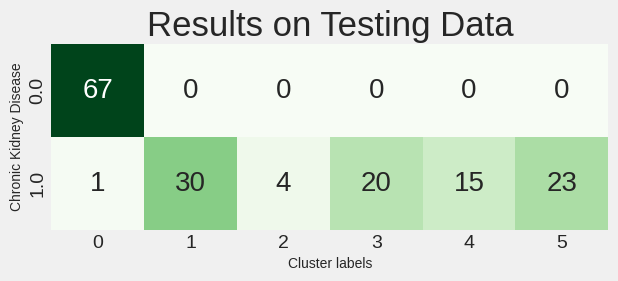

In [ ]:
pca = PCA(n_components=1)
    
pca_training_data=pca.fit_transform(X_train)

model=KMeans(n_clusters=6, random_state=5)
    
model.fit(pca_training_data)

pca_testing_data=pca.transform(X_test)

cluster_labels=model.predict(pca_testing_data)

sns.heatmap(pd.crosstab(Y_test,cluster_labels),
                cmap='Greens',
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':20},
                fmt='d')

plt.title("Results on Testing Data",fontsize=25)
plt.ylabel("Chronic Kidney Disease",fontsize=10)
plt.xlabel("Cluster labels",fontsize=10)
plt.show()

KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load the data
data = pd.read_csv('kidney_disease.csv')

# Drop rows with missing values
data.dropna(inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('classification', axis=1),
    data['classification'],
    test_size=0.2,
    random_state=42)

# One-hot encode the non-numeric columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'])], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)



In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [ ]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)



KNeighborsClassifier()

In [ ]:
# Evaluate the KNN classifier on the test set
test_acc = knn.score(X_test_scaled, y_test)


In [ ]:

# Print the test accuracy
print('Test accuracy:', test_acc)

Test accuracy: 0.9375
